# Analysis of Air Passenger Arrival and Departure Trends in Singapore


Semester: AY2023/24 Semester 2

## Team submitting the assignment

|Team number | Name | NUSNet ID (exxxxxxx) | Student number (AxxxxxxxZ) |
|------------|------|----------------------|----------------------------|
| 10 |Li Zelin              |e1237217                      |A0286155X                             |
| 10 |Huang Ruiwen      |e1132297                      |A0276564R                             |
| 10 |Huang Yuntao           |e0225121                      |A0176535X   
| 10 |    He Yuting          |  e1237238                    |A0286176R




## Introduction


### Background

>It is crucial for an airport to analyze and comprehend the data regarding the number of passengers arriving and departing from the airport. This enables the relevant government department to prepare for handling potentially large crowds, such as implementing strategies to prevent traffic congestion and facilitate traffic flow, considering that everyone is heading to the same destination - the airport.  <sup>[Source: Singapore's open data collective] </sup>



We have decided to **predict the number of departing passengers from Changi Airport**.



## Task 1: Problem definition

Our objectives for this data pipeline:

- use machine learning models to predict the total number of passengers departing from Singapore by air.
- use graphs to gain insights into the changes and geographic distribution of passengers entering and departing from Singapore by air over the years.


### Models Application and Evaluation
To predict the total number of depature passengers, several models were applied. The models were chosen based on their suitability for time series forecasting and their ability to capture data patterns.

The models used in the prediction are as follows:
* **XGBoost:** A learning method that combines multiple weak learners to create a strong predictive model. It is known for its high accuracy and ability to handle complex relationships in the data.

* **Random Forest:** A learning method that constructs multiple decision trees and combines their outputs to make predictions. It is robust to overfitting and can handle high-dimensional data.

* **Linear Regression:** A simple model that assumes a linear relationship between the input features and the target variable. It is often used as a baseline model for comparison.

* **ARIMA:** Autoregressive Integrated Moving Average, a popular model for time series forecasting. It is known for capturing the trends in the data.

### Metrics

To evaluate the prediction accuracy of each model, the predicted values were plotted against the actual values using a residual plot for each model. The residual plot helps visualize the difference between the predicted and actual values.

Furthermore, three commonly used metrics were employed to assess the model performance:

1.   **R2 (Coefficient of Determination):**  Represents the proportion of the variation in the dependent variable that is predictable from the independent variable. A higher R2 value indicates better model performance.

2.   **RMSE (Root Mean Squared Error):** Measures the average magnitude of the prediction errors.

3.   **MAPE (Mean Absolute Percentage Error):** Represents the average absolute difference between the predicted and actual values as a percentage.


#### Import modules/packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import datetime as dt
from math import sqrt
import seaborn as sns
import math
import re

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as sm

## Task 2: Data collection/curation

Initially, we utilized 6 datasets in our pipeline from the Civil Aviation Authority of Singapore (CAAS). Specifically, the datasets used in this project are:

- passengerArrivalTotal: https://beta.data.gov.sg/datasets/d_0dd661d35ab2a9e59d8e77fee8ed3c7a/view
- passengerArrivalbyCountry: https://beta.data.gov.sg/datasets/d_85d4bacd407ddf8b0b7d9a4089769321/view
- passengerArrivalbyRegion: https://beta.data.gov.sg/datasets/d_552887b6cf1cf0ec0dc8ea3e56bc406f/view
- passengerDepartureTotal: https://beta.data.gov.sg/datasets/d_a81d5f8d52b89970823dcb17c3e9a77f/view
- passengerDeparturebyCountry: https://beta.data.gov.sg/datasets/d_63376918b07c22a30969ba4a9ce6ac58/view
- passengerDeparturebyRegion: https://beta.data.gov.sg/datasets/d_449d7c1fe63a84242813f4181b50bfdc/view

However, upon further analysis, we discovered that countries/regions cannot be considered as features for prediction since their sum is equal to the total number, which is already captured in the total number features.

Moreover, using only the total number of arrivals and departures proved insufficient for time series analysis models due to the limited number of features, leading to significant errors. To address this issue and enhance the features, we incorporated two additional datasets relevant to our analysis. The two supplementary datasets are:

- TotalVisitorInternationalArrivalsMonthly: https://beta.data.gov.sg/datasets/d_33796e0e35e57890bdd6aa34364b898d/view
- TotalAirCargoLoaded: https://beta.data.gov.sg/datasets/d_89b8d4e5fc980bbf8d8f9bad0baf465b/view

These two additional datasets not only provide more features for data predictions but also show Singaporean air traffic during the same period from other aspects, which could help improve model performance.


All datasets were downloaded from DATA.GOV.SG, a trusted website, and imported into Google Colab for further processing.

## Task 3: Data preparation

### Columns/attributes of dataset
First, the columns of the three arrival datasets were renamed to more accurately convey information and useless columns were dropped. Then the regions and countries were set as features. Following that, the three arrival datasets were combined based on "date" column. Therefore, the used arrival dataset has 21 columns, namely 'date', 'ArrivalTotal', 'Europe', 'Middle East', 'North America', 'Northeast Asia', 'Oceania', 'South Asia', 'Southeast Asia', 'Indonesia', 'Japan', 'Malaysia', 'Philippines', 'Thailand', 'United Kingdom', "China", "France", "Germany", "Hong Kong", "Vietnam" and "Other Regions".

### Handling missing data
The 6 primary datasets contain data starting from January 1961, with 'na' values in the early consecutive years. These missing values were replaced with '0' to maintain consistency.

However, the two supplementary datasets, 'TotalVisitorInternationalArrivalsMonthly' and 'TotalAirCargoLoaded', only have recorded values starting from January 1978 and January 1986, respectively. To ensure compatibility across all datasets, we retained only the data points starting from January 1986 onwards for modeling purpose in Task 5.

#### Import the data

In [2]:
# Six datasets from
passengerArrivalTotal=pd.read_csv('TotalAirPassengerArrivals.csv')
passengerDepartureTotal=pd.read_csv('TotalAirPassengerDepartures.csv')

passengerArrivalbyCountry=pd.read_csv('TotalAirPassengerArrivalsbyCountry.csv')
passengerDeparturenyCountry=pd.read_csv('TotalAirPassengerDeparturesbyCountry.csv')


passengerArrivalbyRegion=pd.read_csv('TotalAirPassengerArrivalsbyRegion.csv')
passengerDeparturebyRegion=pd.read_csv('TotalAirPassengerDeparturesbyRegion.csv')


# Two additional datasets
TotalVisitorInternationalArrivalsMonthly=pd.read_csv('TotalVisitorInternationalArrivalsMonthly.csv')
TotalAirCargoLoaded=pd.read_csv('TotalAirCargoLoaded.csv')


#### Rename the Column of the Dataset

The columns of the  datasets were renamed to more accurately convey information and useless columns were dropped.


In [3]:
passengerArrivalTotal=passengerArrivalTotal.rename(columns={'value': 'ArrivalTotal', 'month':'date'})
passengerArrivalTotal=passengerArrivalTotal.drop(columns=['level_1'])

passengerArrivalbyCountry=passengerArrivalbyCountry.rename(columns={'value': 'CountryArrivalTotal', 'month':'date','level_3':'Country'})
passengerArrivalbyCountry=passengerArrivalbyCountry.drop(columns=['level_1','level_2'])

passengerArrivalbyRegion=passengerArrivalbyRegion.rename(columns={'value': 'RegionArrivalTotal', 'month':'date','level_2':'Region'})
passsengerArrivalbyRegion=passengerArrivalbyRegion.drop(columns=['level_1'])

passengerDepartureTotal=passengerDepartureTotal.rename(columns={'value': 'DepartureTotal', 'month':'date'})
passengerDepartureTotal=passengerDepartureTotal.drop(columns=['level_1'])

passengerDeparturenyCountry=passengerDeparturenyCountry.rename(columns={'value': 'CountryDepartureTotal', 'month':'date','level_3':'Country'})
passengerDeparturenyCountry=passengerDeparturenyCountry.drop(columns=['level_1','level_2'])

passengerDeparturebyRegion=passengerDeparturebyRegion.rename(columns={'value': 'RegionDepartureTotal', 'month':'date','level_2':'Region'})
passengerDeparturebyRegion=passengerDeparturebyRegion.drop(columns=['level_1'])


TotalAirCargoLoaded=TotalAirCargoLoaded.rename(columns={'value': 'TotalAirCargoLoaded', 'month':'date'})
TotalAirCargoLoaded=TotalAirCargoLoaded.drop(columns=['level_1'])

TotalVisitorInternationalArrivalsMonthly=TotalVisitorInternationalArrivalsMonthly.rename(columns={'month':'date'})

#### Replace missing values with '0'
There are no 0 values in the dataset, so we replaced "na" and "-" with 0 to smooth the plotting process.

In [4]:
passengerArrivalbyCountry=passengerArrivalbyCountry.replace('na',0)
passengerArrivalbyRegion=passengerArrivalbyRegion.replace('na',0)
passengerDeparturenyCountry=passengerDeparturenyCountry.replace('na',0)
passengerDeparturebyRegion=passengerDeparturebyRegion.replace('na',0)

In [5]:
passengerArrivalbyCountry=passengerArrivalbyCountry.replace('-',0)
passengerArrivalbyRegion=passengerArrivalbyRegion.replace('-',0)
passengerDeparturenyCountry=passengerDeparturenyCountry.replace('-',0)
passengerDeparturebyRegion=passengerDeparturebyRegion.replace('-',0)

#### Transform the rows to columns
We used the pivot function to transform the rows into columns, so we could use them as attributes for analysis. The 'date' column served as the index. The 'Country' and 'Region' columns were used as the new column names.

This transformation enabled us to easily analyze the data based on specific countries or regions over time, as the dates were aligned as rows.

In [6]:
passengerArrivalbyCountry=passengerArrivalbyCountry.pivot(index='date', columns='Country', values='CountryArrivalTotal')
passengerDeparturenyCountry=passengerDeparturenyCountry.pivot(index='date', columns='Country', values='CountryDepartureTotal')

passengerArrivalbyRegion=passengerArrivalbyRegion.pivot(index='date', columns='Region', values='RegionArrivalTotal')
passengerDeparturebyRegion=passengerDeparturebyRegion.pivot(index='date', columns='Region', values='RegionDepartureTotal')

In [7]:
passengerArrivalbyCountry.columns.name = None
passengerArrivalbyCountry.reset_index(inplace=True)

passengerArrivalbyRegion.columns.name = None
passengerArrivalbyRegion.reset_index(inplace=True)

passengerDeparturenyCountry.columns.name = None
passengerDeparturenyCountry.reset_index(inplace=True)

passengerDeparturebyRegion.columns.name = None
passengerDeparturebyRegion.reset_index(inplace=True)


### Tranform the datatype and merge

We transformed the numerical data into integers, and then merged the datasets for plotting graphs and building models.

In [8]:
passengerArrivalbyCountry.iloc[:, 2:] =passengerArrivalbyCountry.iloc[:, 2:].astype(int)
passengerArrivalbyRegion.iloc[:, 2:] =passengerArrivalbyRegion.iloc[:, 2:].astype(int)
passengerDeparturenyCountry.iloc[:, 2:] =passengerDeparturenyCountry.iloc[:, 2:].astype(int)
passengerDeparturebyRegion.iloc[:, 2:] =passengerDeparturebyRegion.iloc[:, 2:].astype(int)
passengerArrivalTotal.iloc[:, 2:] =passengerArrivalTotal.iloc[:, 2:].astype(int)


In [9]:
passengerArrival=pd.merge(passengerArrivalTotal,passengerArrivalbyRegion, on='date',how='outer')
passengerArrival=pd.merge(passengerArrival,passengerArrivalbyCountry, on='date',how='outer')
passengerDeparture=pd.merge(passengerDepartureTotal,passengerDeparturebyRegion, on='date',how='outer')
passengerDeparture=pd.merge(passengerDeparture,passengerDeparturenyCountry, on='date',how='outer')

## Task 4: Exploratory data analysis and visualization

In this section, three different types of charts were plotted to visualize the data.

1. Line Chart:
- The total number of arrivals and departures were plotted against the date between 1961 and 2019 in a line chart. The arrival and departure numbers for different countries and regions from the dataset were also included in the same graph.
- Two additional line charts were created for the supplementary datasets: total visitor arrivals and total air cargo loaded.
- Line charts for individual countries were also plotted, revealing significant variations in patterns among them.
- The line charts provided an overview of the trends in the total number of arrivals, departures, visitors, cargo loaded, etc.

2. Stacked Bar Chart:
- Stacked bar charts were used to display the arrival and departure numbers for different countries and regions.
- The charts were plotted by decades, providing an understanding of how the proportions of passengers changed within each decade.

3. Pie Chart:
- Pie charts were created for each decade to show the total percentage of passengers entering or leaving Singapore from or for each country or region.
- These charts helped visualize which countries contributed the most to the passenger traffic in Singapore during each decade.

The visualizations offered valuable insights into the patterns and trends of passenger arrivals and departures in Singapore over time, as well as the relative contributions of different countries and regions to the overall traffic. As shown in the line charts, there were troughs clearly seen in some years. However, labeling the troughs as outliers in specific years was challenging because both the cargo and the number of visitors features exhibited similar troughs. Given that this was a real-world dataset, it was natural to expect the occurrence of both peaks and troughs. To facilitate more accurate predictions, the quantities of international visitors and cargo were incorporated as additional features in the analysis.

### 1. Line Chart
This part started by plotting a line graph to examine the overview and overall trends of the following datasets:
passengerArrivalTotal, passengerDepartureTotal, TotalVisitorInternationalArrivalsMonthly, TotalAirCargoLoaded.

#### Define the function for drawing line charts

In [10]:
def plot_line_passenger_departure(dataframe):
    df = dataframe.copy()

    # Assuming the first column is the date
    regions = df.columns[2:]

    # Ensure 'date' column is of datetime type
    df['date'] = pd.to_datetime(df['date'])

    # Create a list of ticks for every ten years
    start_year = df['date'].dt.year.min()
    end_year = df['date'].dt.year.max()
    ticks = [pd.Timestamp(year=year, month=1, day=1) for year in range(start_year, end_year+1, 10)]

    # Calculate number of rows
    n_rows = len(regions) // 2 + len(regions) % 2

    # Create a grid of subplots, with 2 subplots per row
    fig, axs = plt.subplots(n_rows, 2, figsize=(15,6* n_rows))

    for i, region in enumerate(regions):
        # Calculate row and column index for the current subplot
        row = i // 2
        col = i % 2

        # Get the current axis
        ax = axs[row, col]

        # Plot the data
        ax.plot(df['date'], df[region])
        ax.set_title(region)

        # Set major ticks on x-axis to our custom ticks list
        ax.set_xticks(ticks)

        # Customize tick format
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Optimize tick label display to avoid overlap
        # fig.autofmt_xdate()
    if len(regions) % 2:
        fig.delaxes(axs[-1, -1])

    plt.tight_layout()
    plt.show()
    del df


In [11]:
def plot_line_passenger_departure_single(dataframe,name):
    df = dataframe.copy()

    regions = df.columns[1:]

    df['date'] = pd.to_datetime(df['date'])


    start_year = df['date'].dt.year.min()
    end_year = df['date'].dt.year.max()
    ticks = [pd.Timestamp(year=year, month=1, day=1) for year in range(start_year, end_year + 1, 10)]


    fig, ax = plt.subplots(figsize=(15, 8))


    for region in regions:
        ax.plot(df['date'], df[region], label=region)


    ax.set_title(f'{name}')
    ax.legend()


    ax.set_xticks(ticks)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 1.1 Plotting the line charts for arrival numbers, departure numbers, total visitors, and total cargo loaded

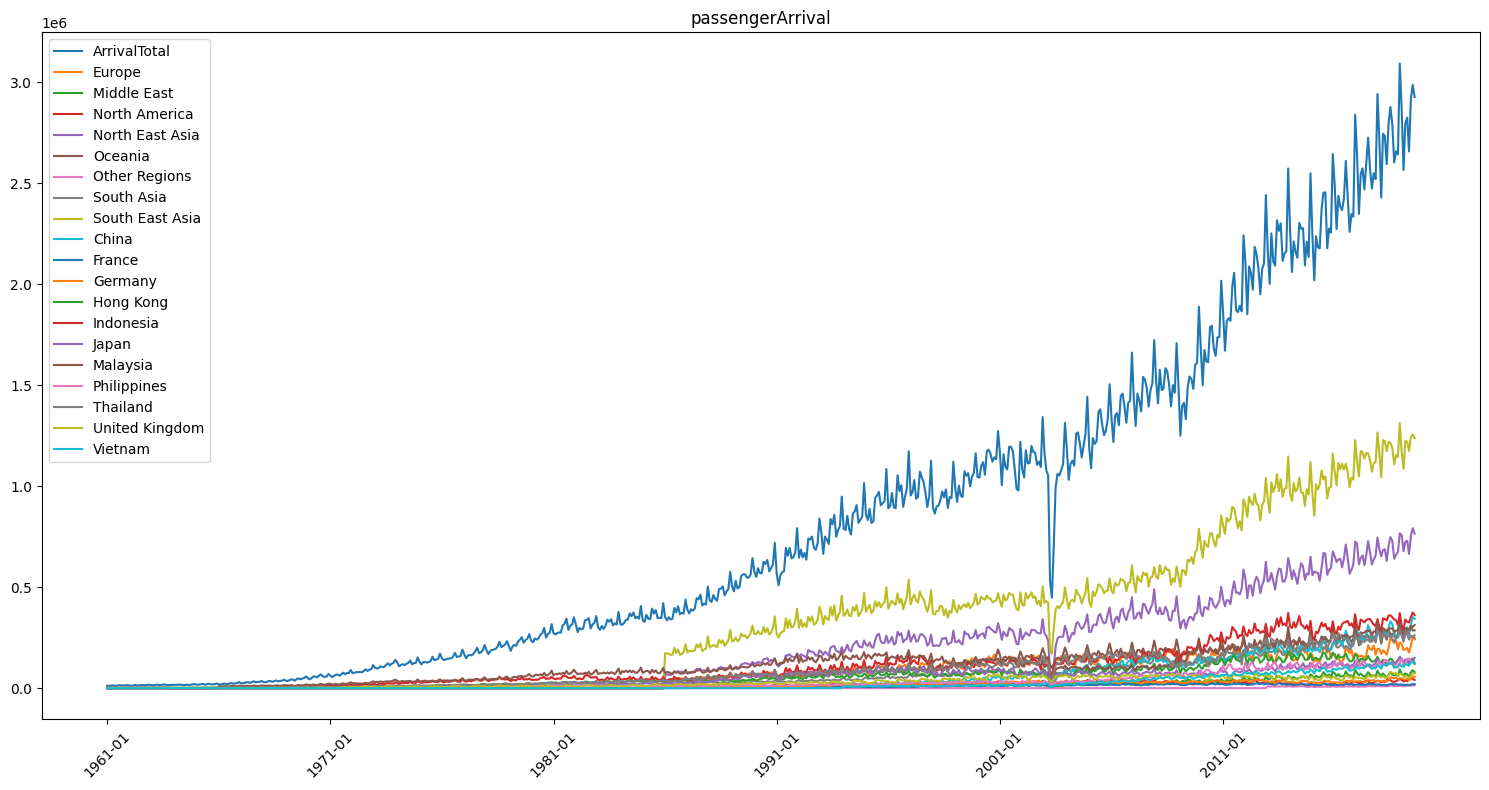

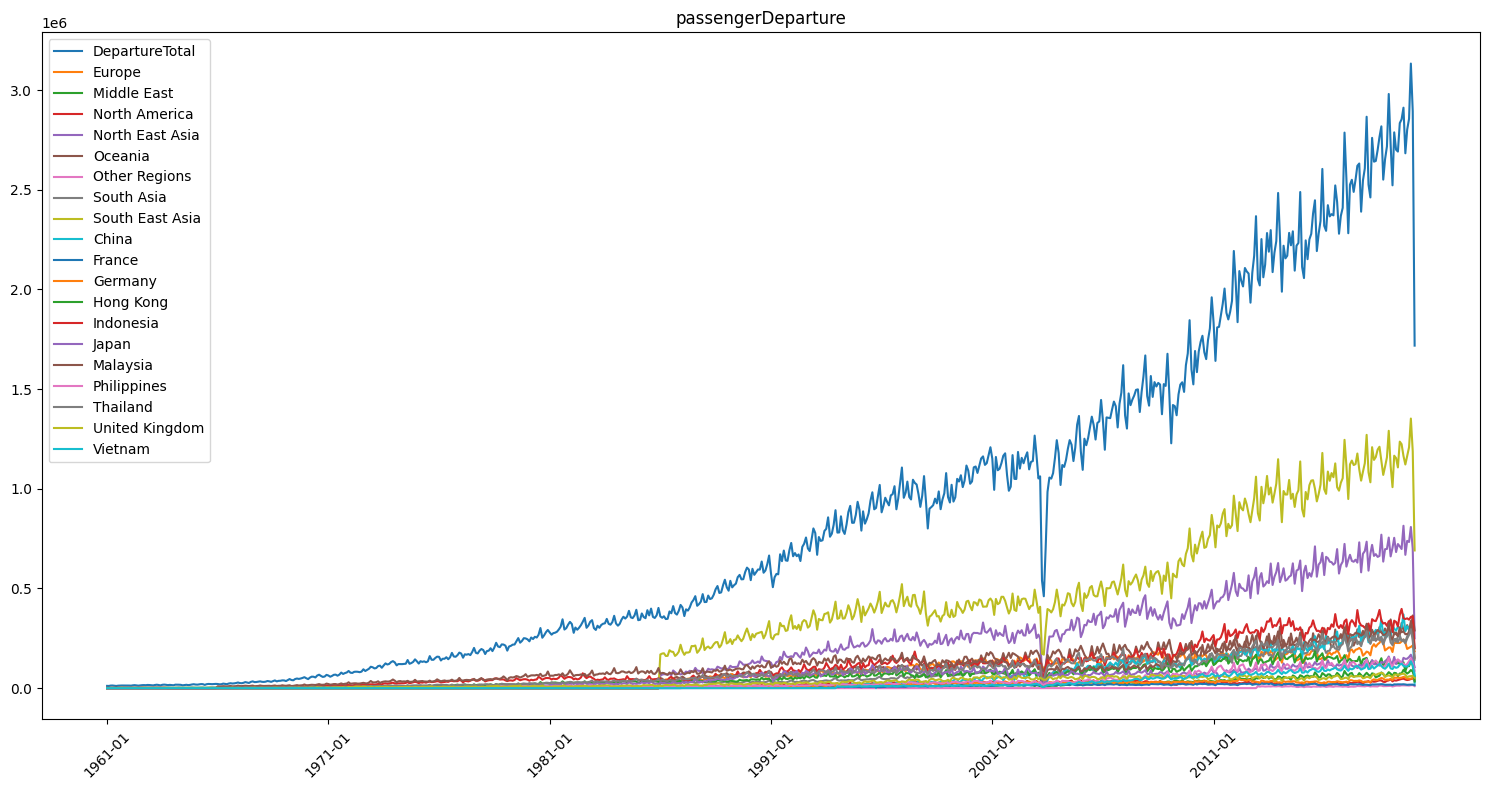

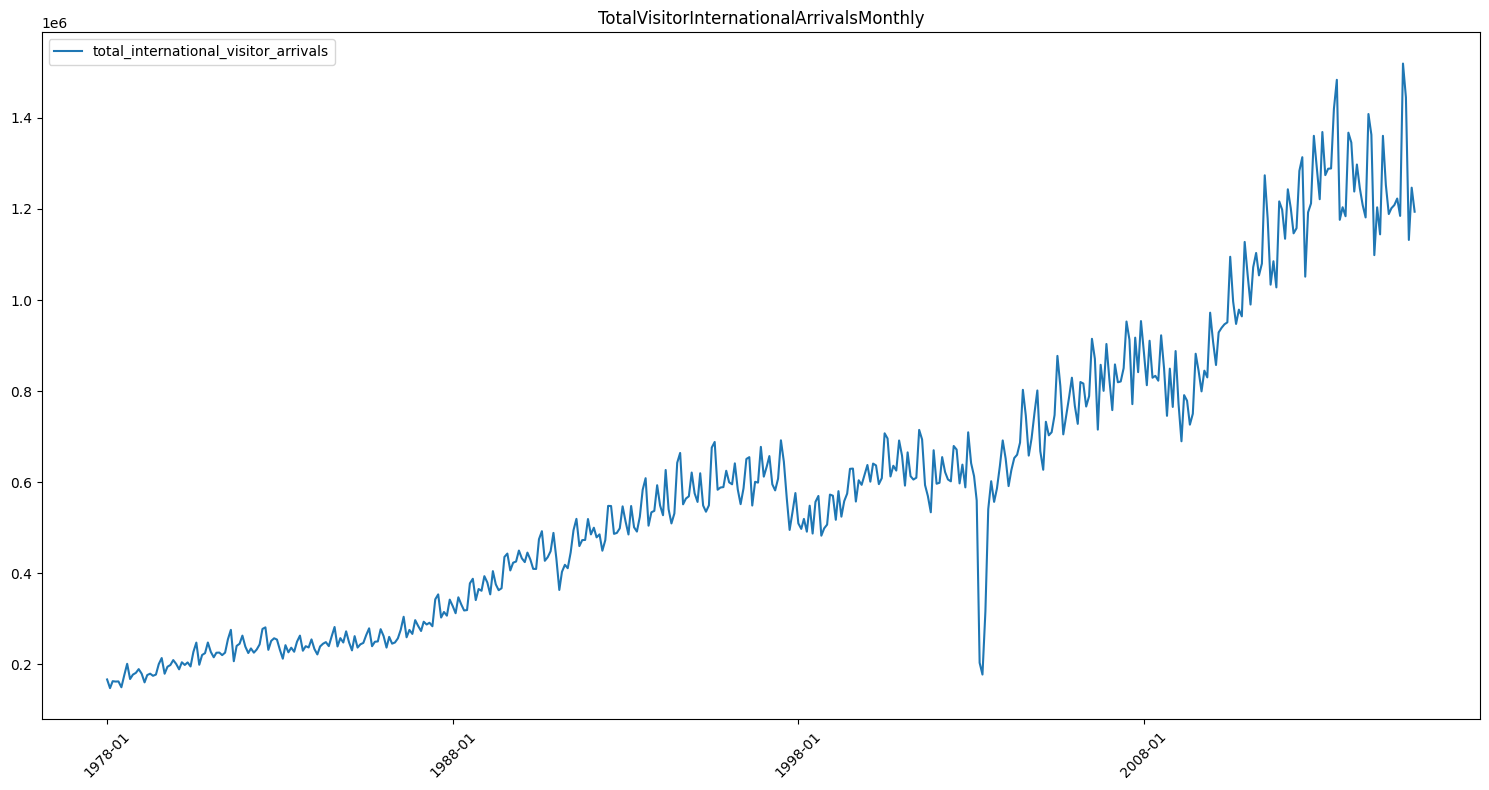

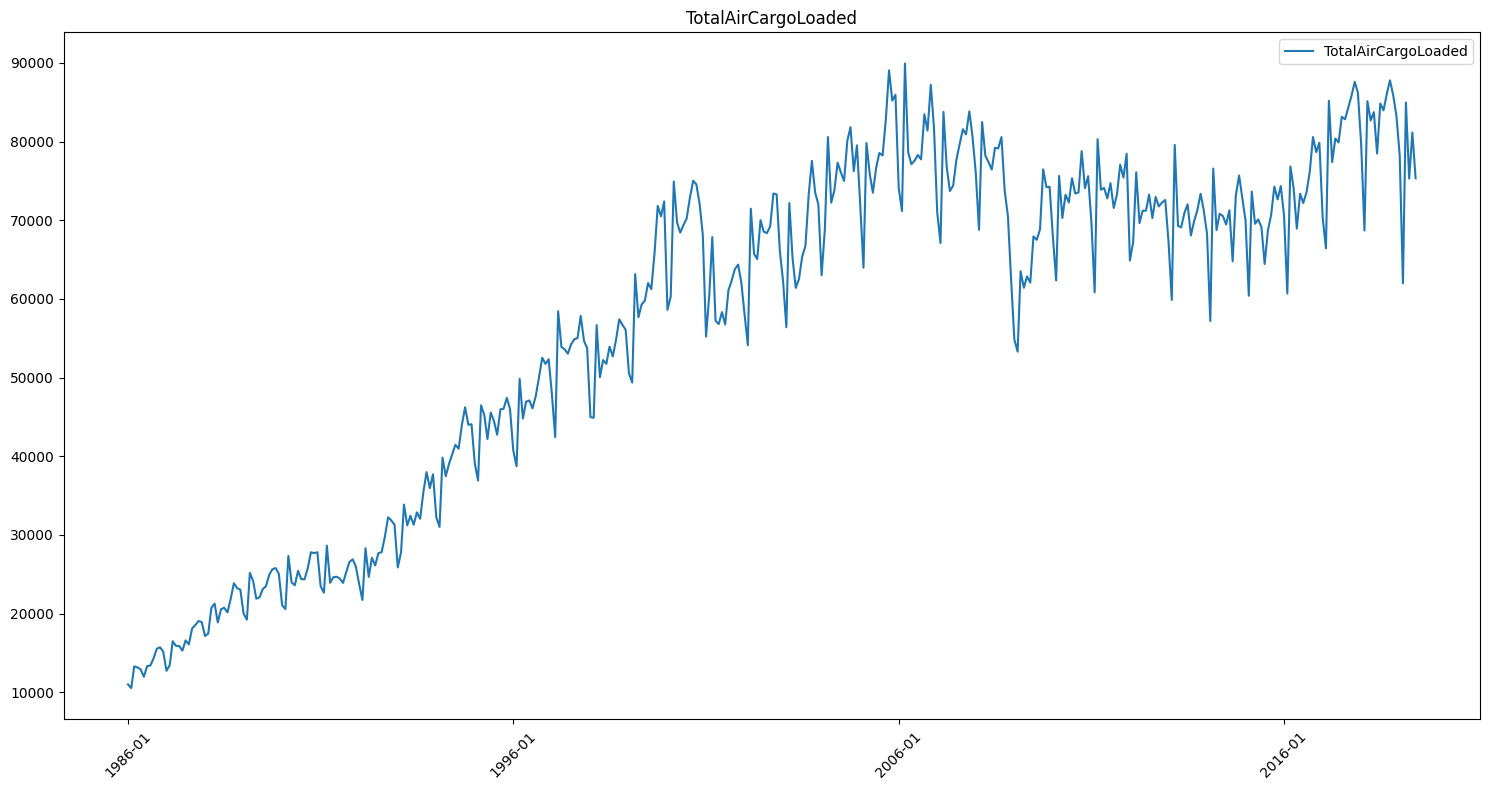

In [12]:
plot_line_passenger_departure_single(passengerArrival,'passengerArrival')
plot_line_passenger_departure_single(passengerDeparture,'passengerDeparture')
plot_line_passenger_departure_single(TotalVisitorInternationalArrivalsMonthly,'TotalVisitorInternationalArrivalsMonthly')
plot_line_passenger_departure_single(TotalAirCargoLoaded, 'TotalAirCargoLoaded')


#### Observation from the line charts

From the four plots, it can be observed that the cargo, arrival numbers, departure numbers, and international visitor numbers exhibit similar trends: as the years progress, the numbers also increase, albeit with fluctuations. Additionally, we notice that the missing values are predominantly present in the initial few years of the data.

### 1.2 Plotting the line chart for inividual countries and regions

#### The line charts for arrivals by different countries


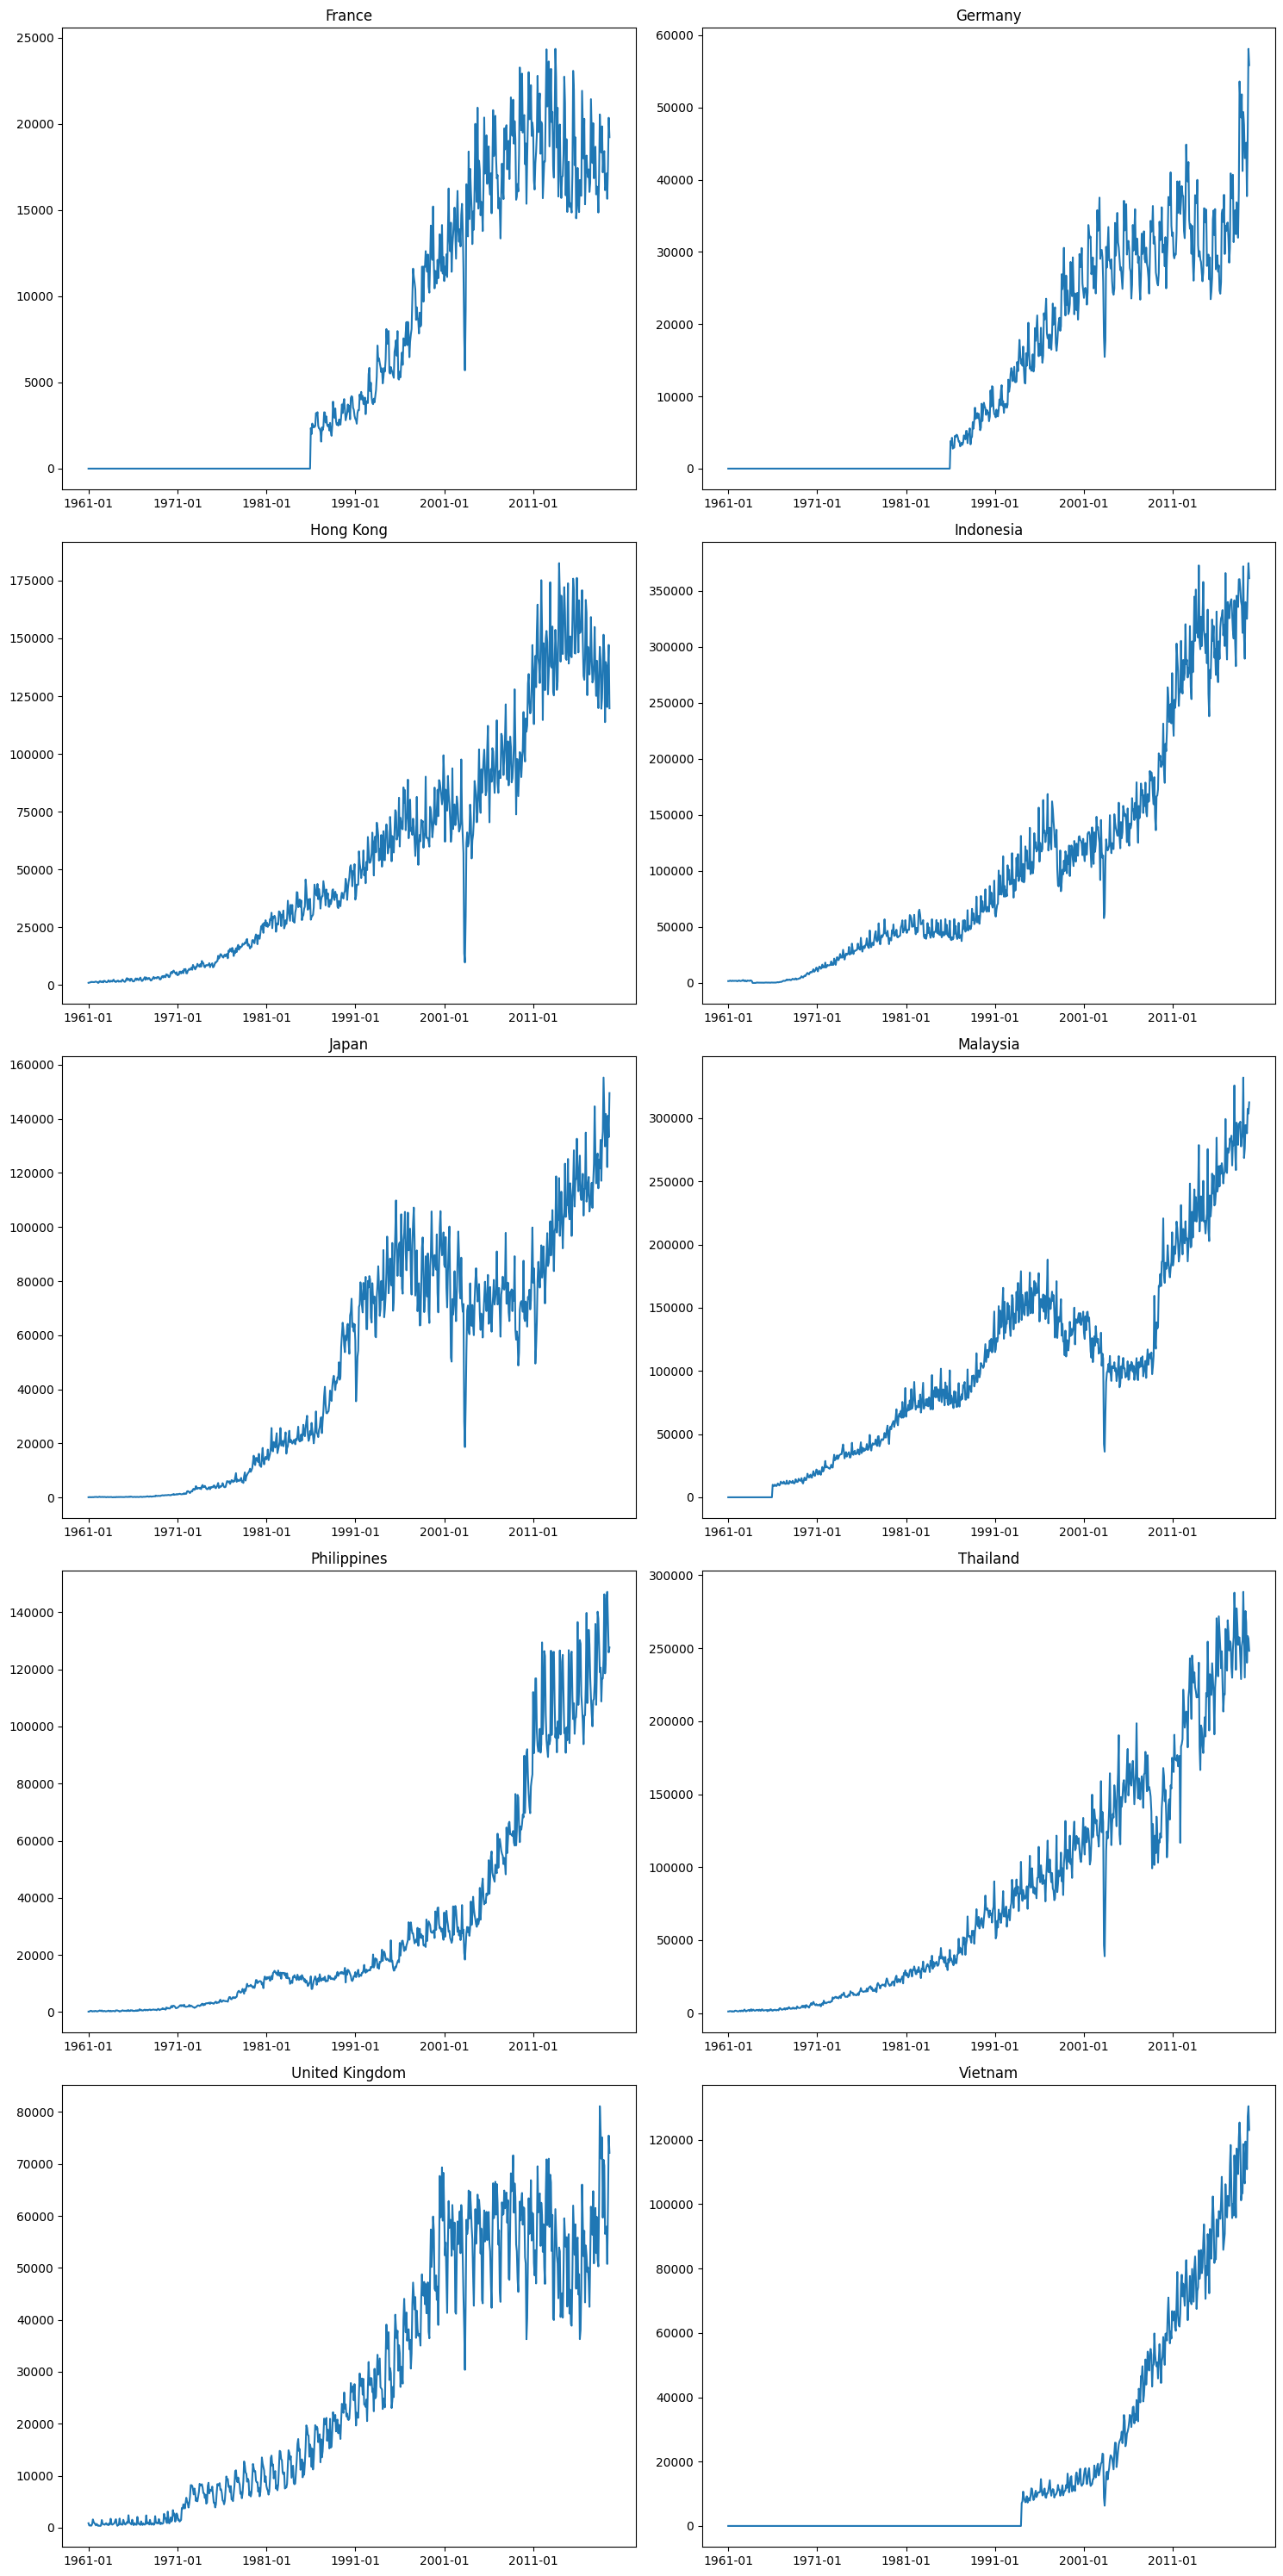

In [13]:
plot_line_passenger_departure(passengerArrivalbyCountry)

#### The line charts for depatures by different countries


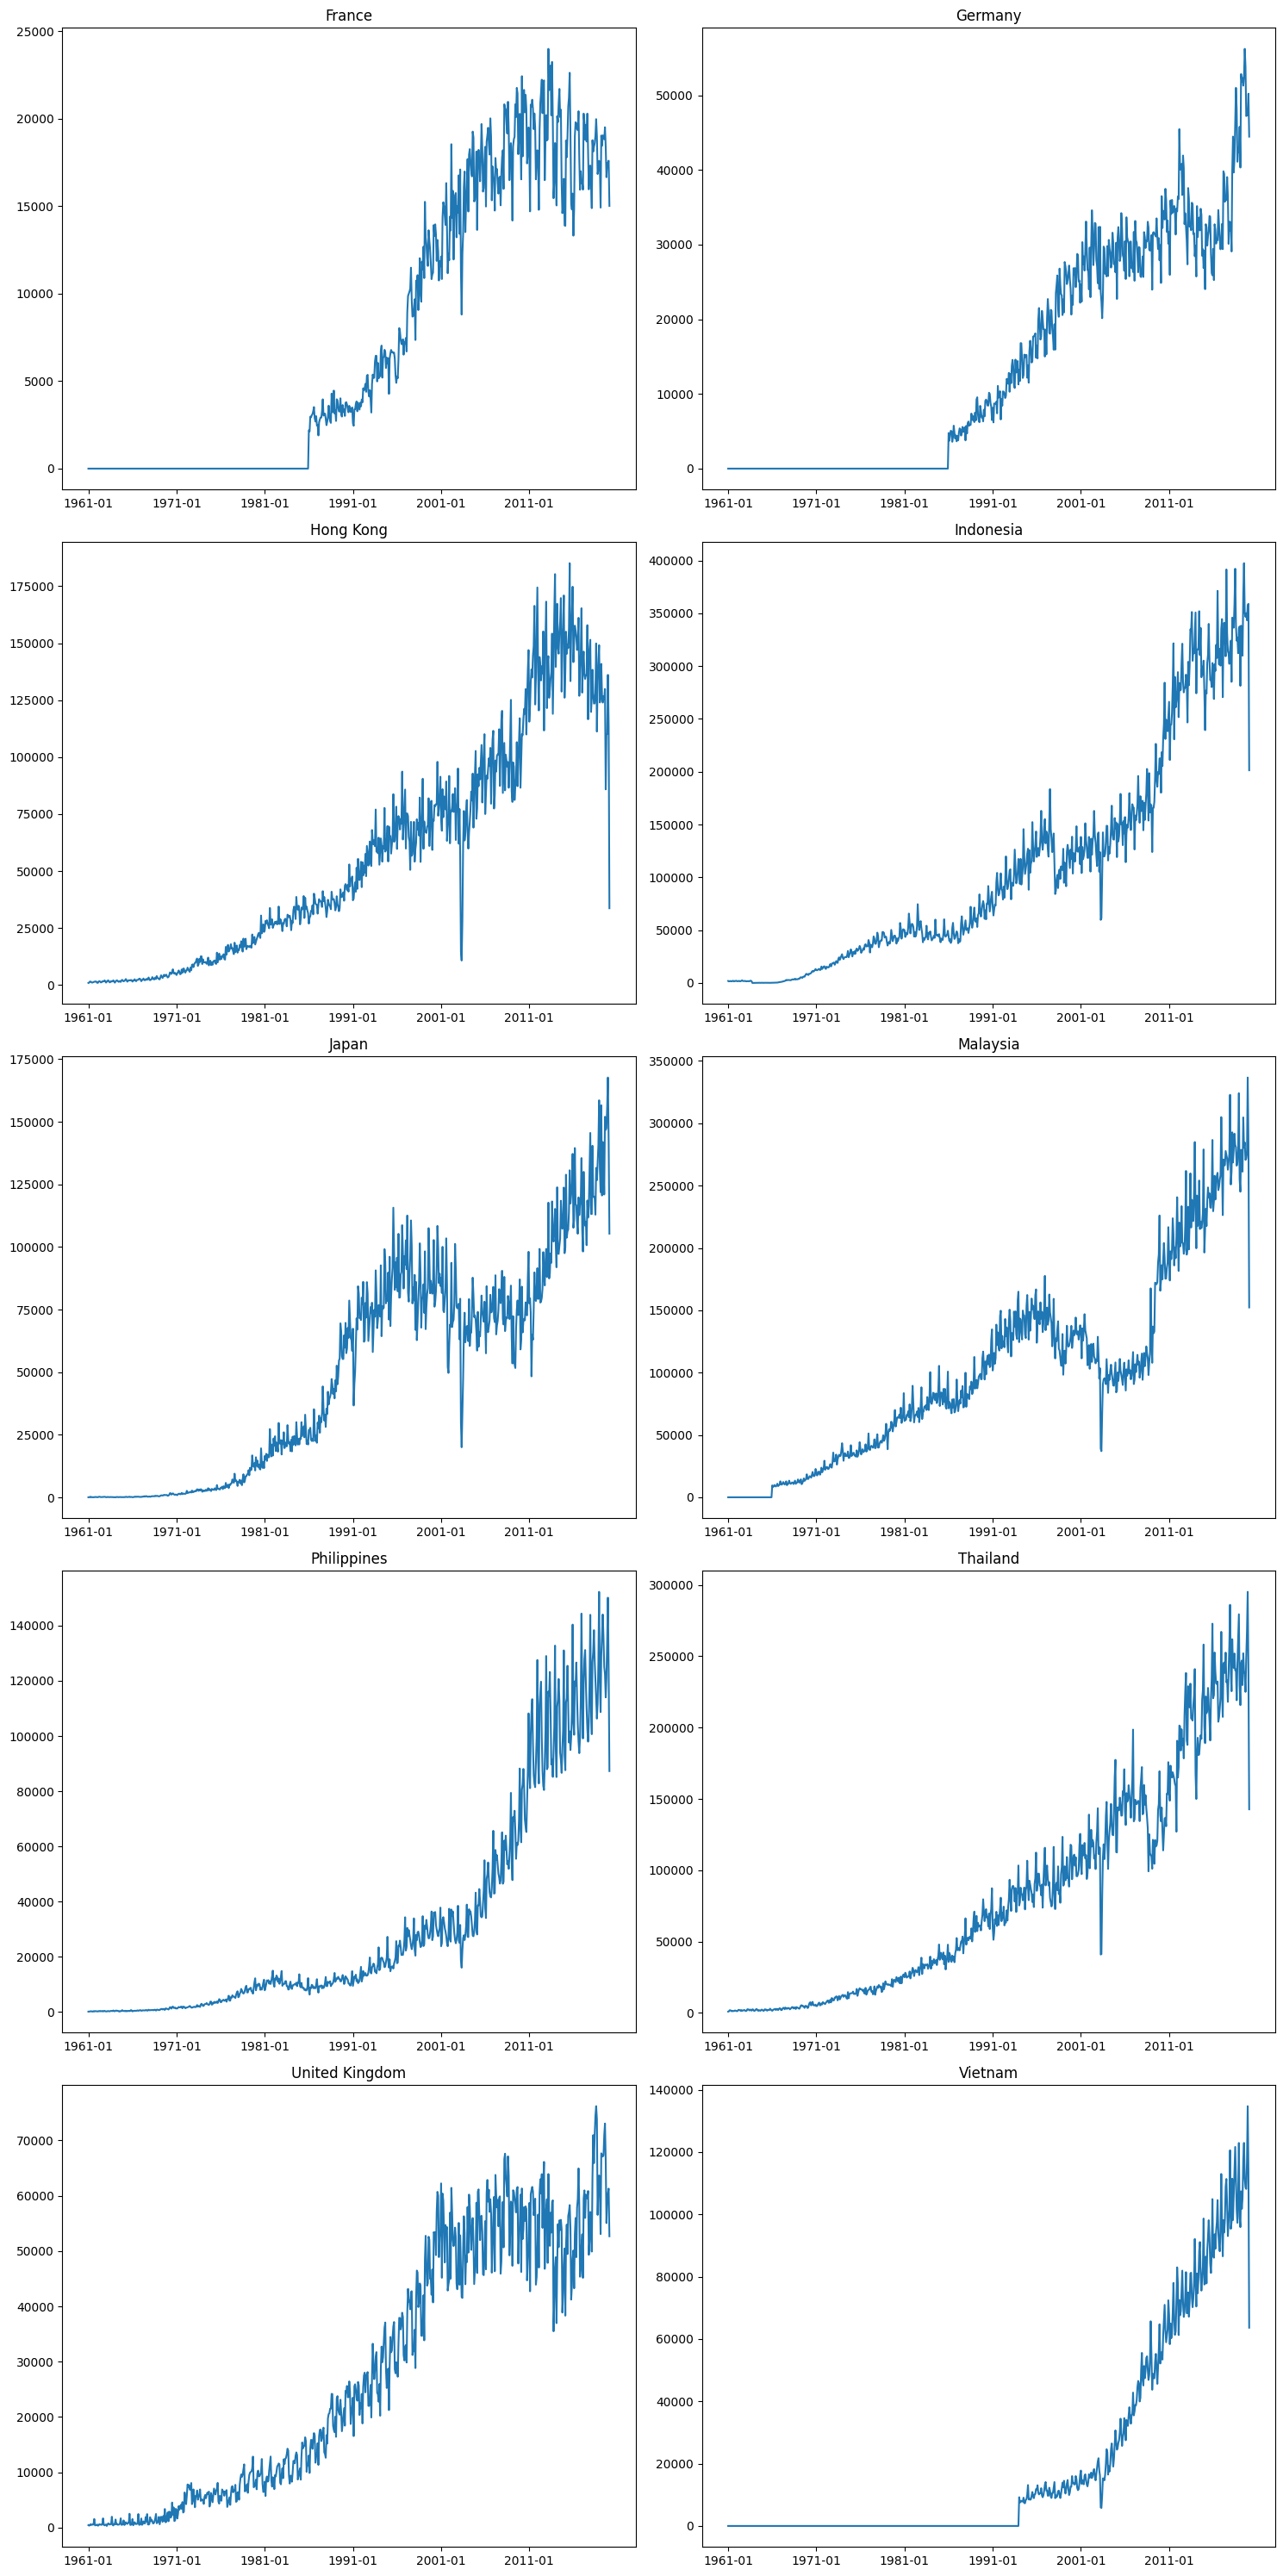

In [14]:
plot_line_passenger_departure(passengerDeparturenyCountry)

#### The line charts for arrivals by different regions

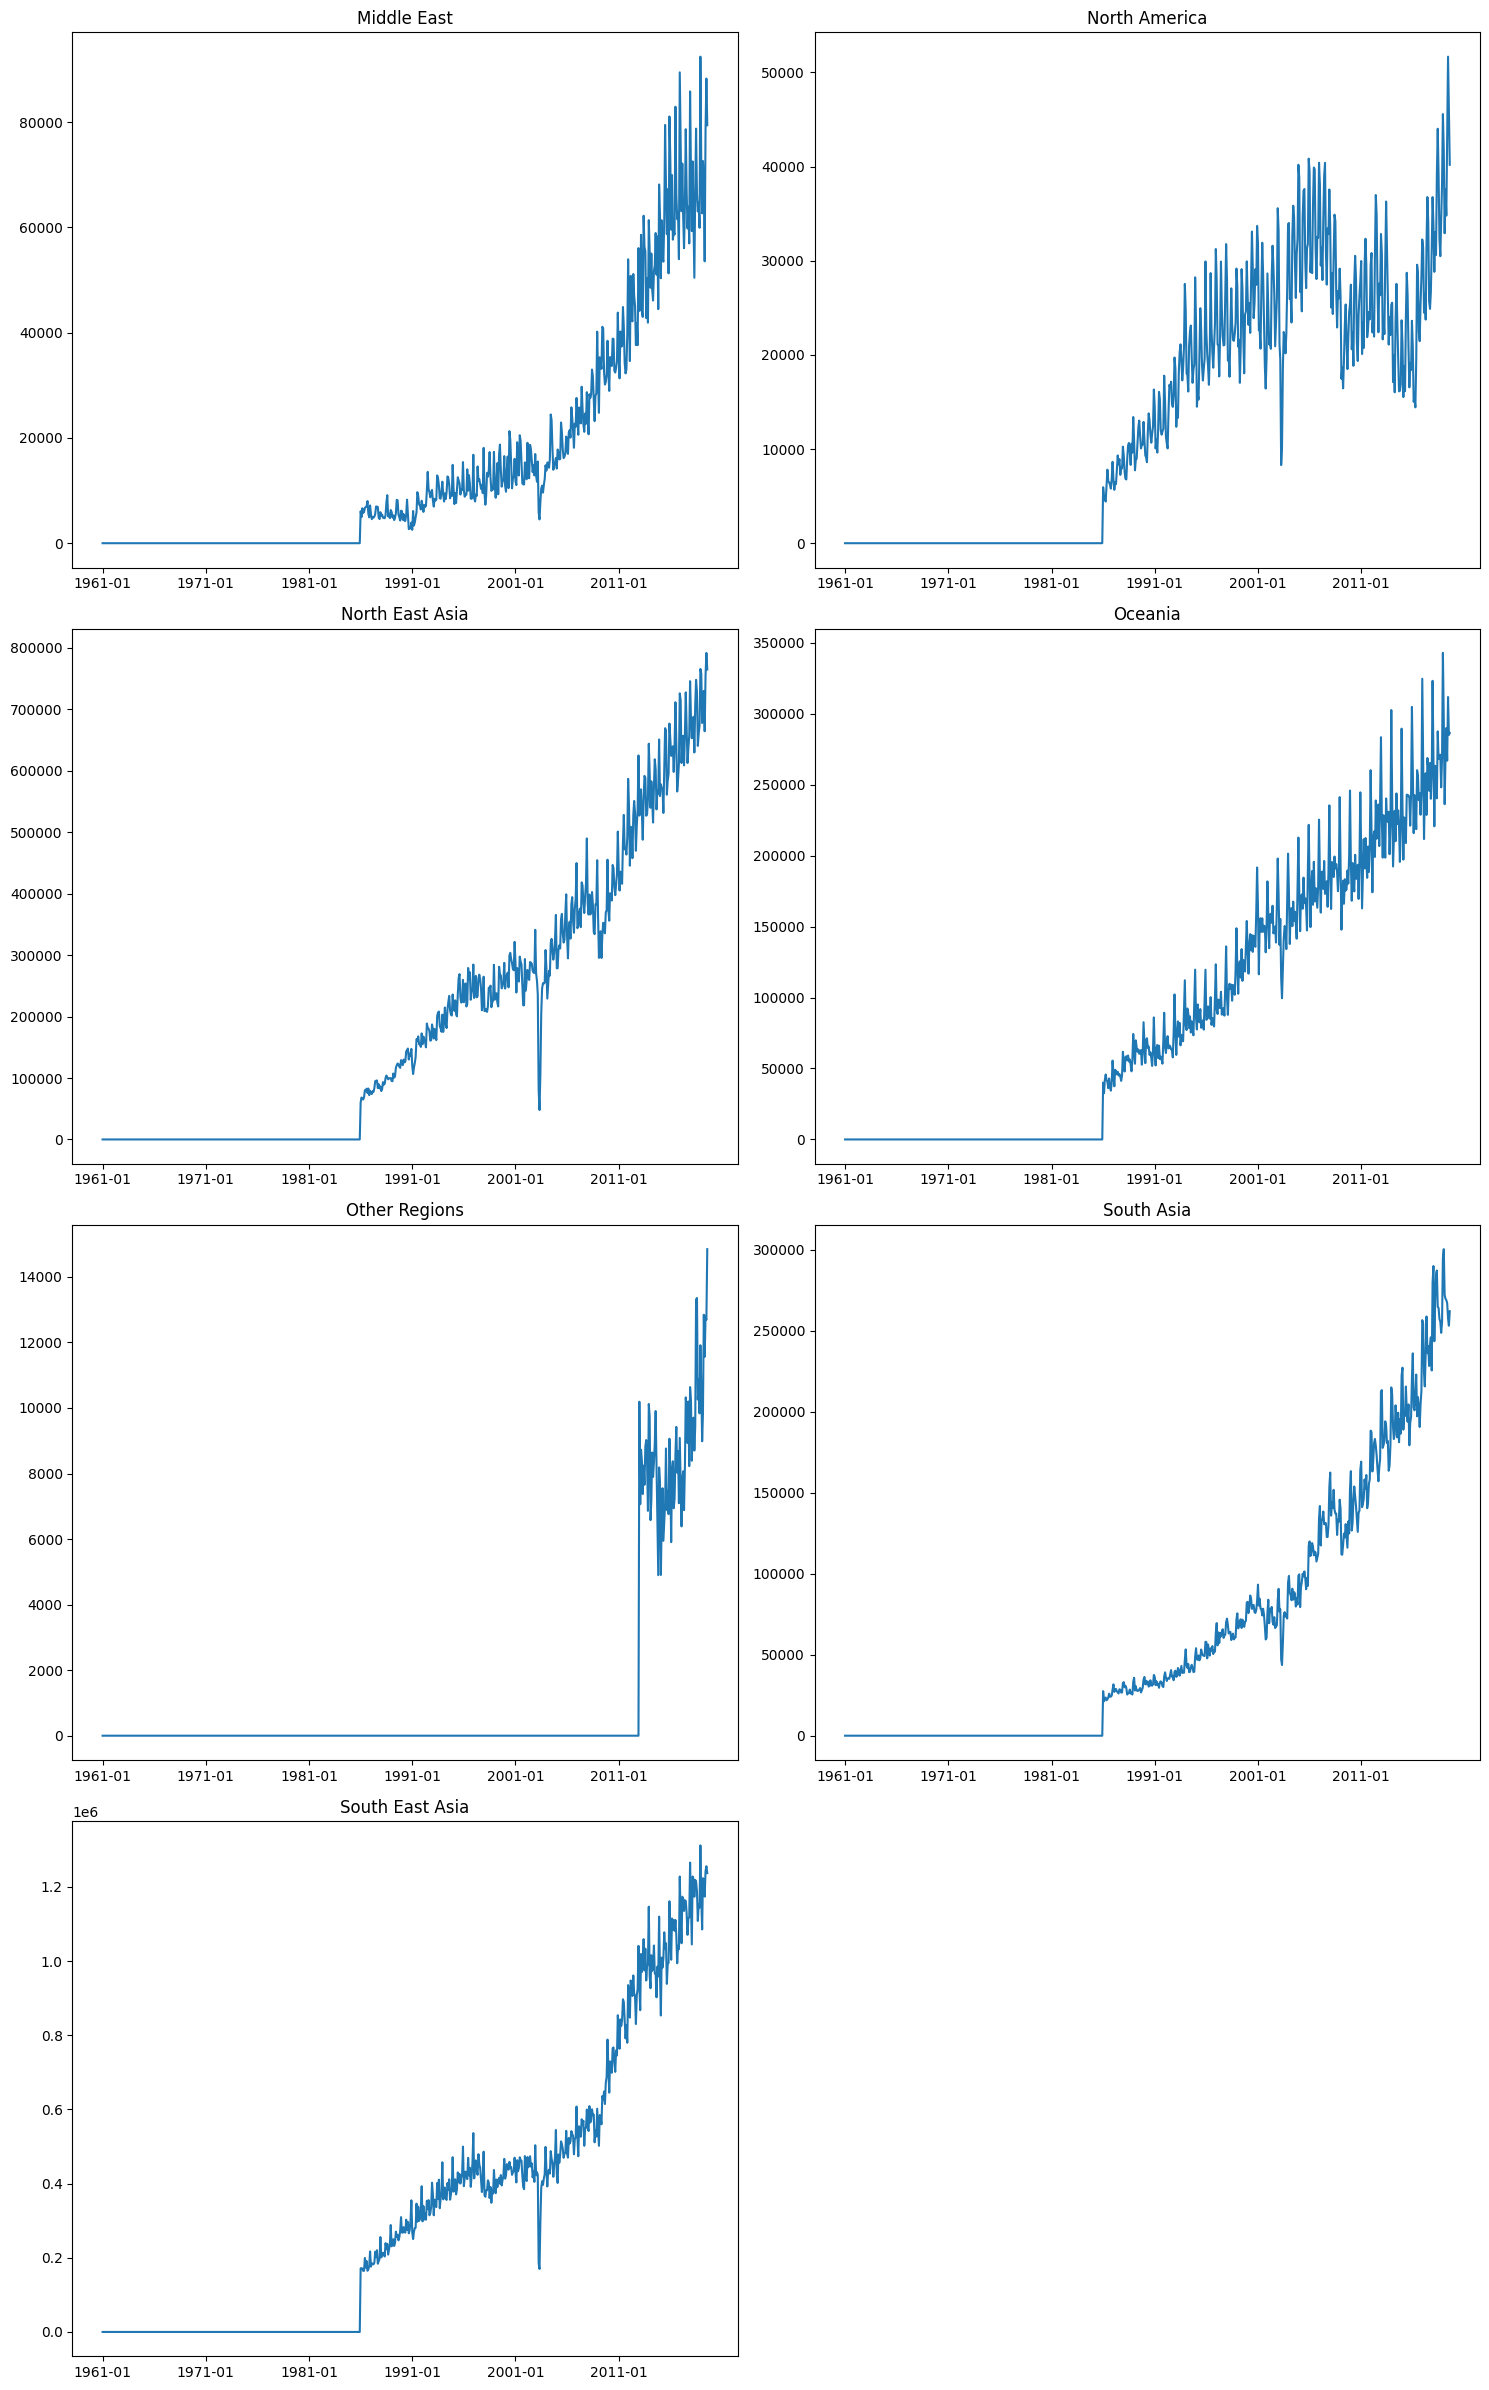

In [15]:
plot_line_passenger_departure(passengerArrivalbyRegion)

#### The line charts for departures by different regions

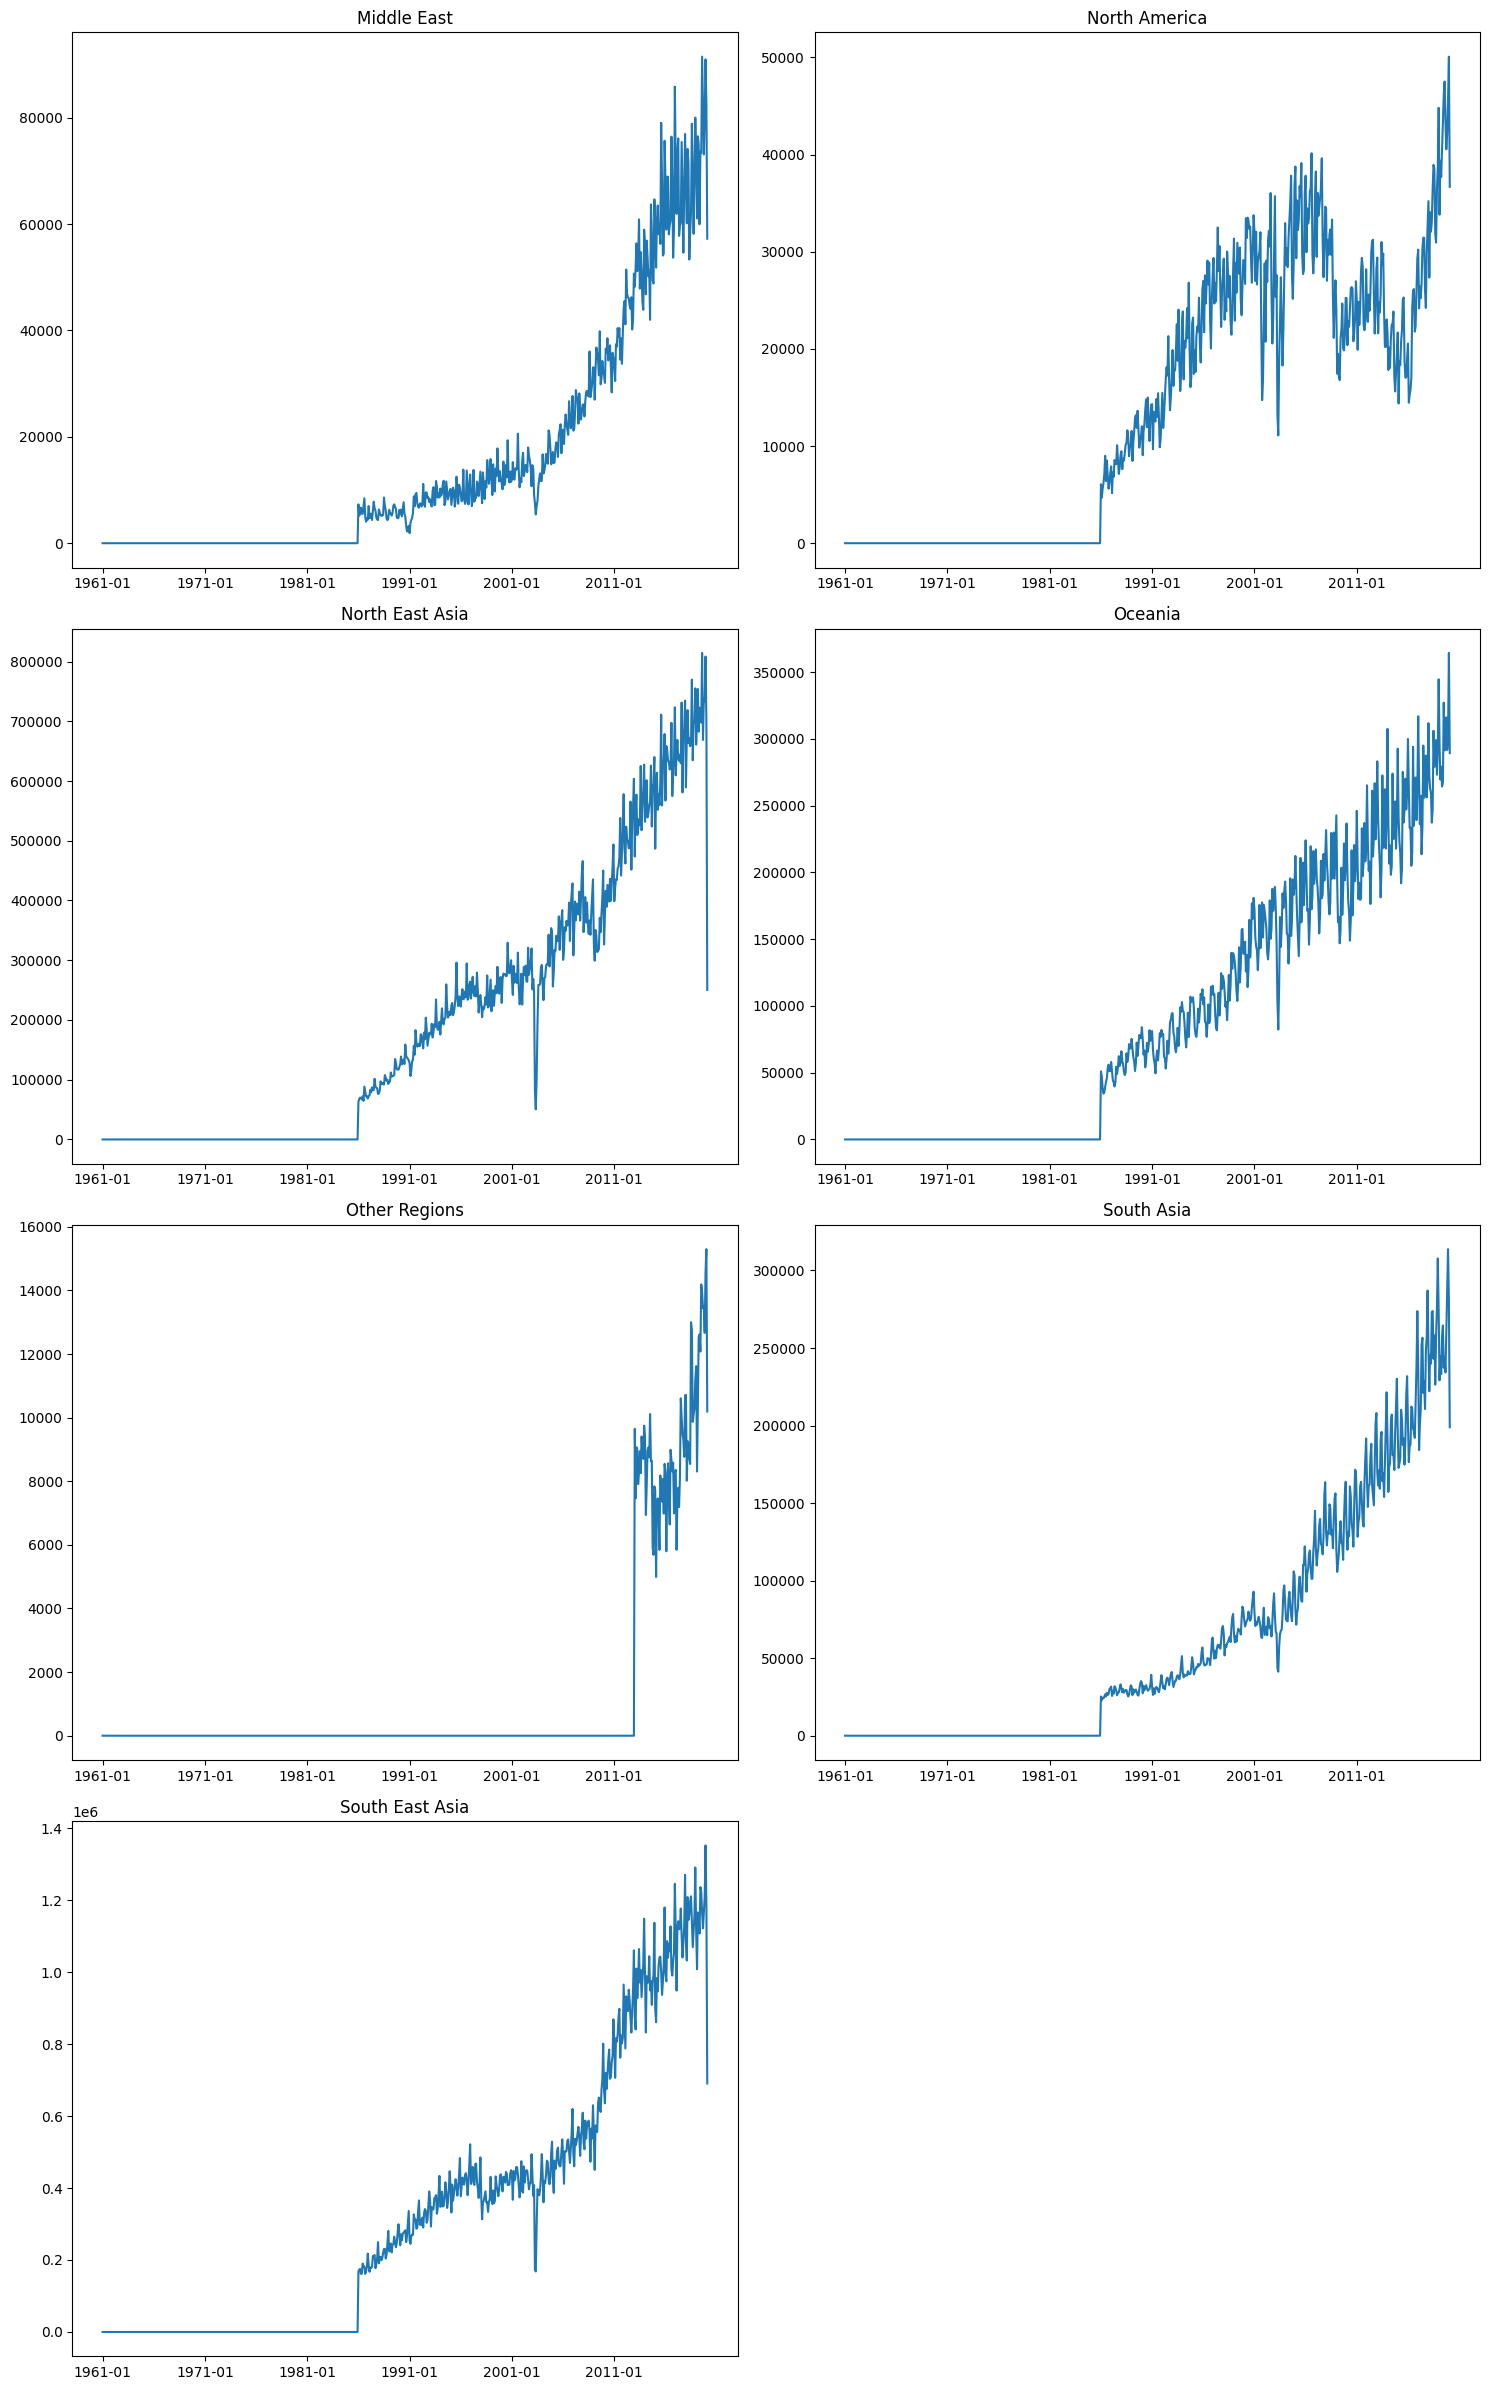

In [16]:
plot_line_passenger_departure(passengerDeparturebyRegion)

#### Observations from the individual line charts

Although the number of departures and arrivals increases over time in all countries/regions, there are significant differences between countries and regions, as well as variations in the extent of fluctuations.






###2. Stacked Bar Chart
To gain a more detailed understanding of the data, we created stacked bar charts at 10-year intervals. This approach allowed us to visualize the changes and patterns in the data over each decade, providing valuable insights into the evolving trends of passenger arrivals and departures across different countries and regions.

#### Define the function for drawing stacked bar chart

In [17]:
def plot_decade_passenger(dataframe, name, date_column='date', date_format='%Y-%m', figsize=(10, 8)):
    df = dataframe.copy()
    # Convert "date" to datetime format
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)
    # Create a new column for the decade
    df['decade'] = (df[date_column].dt.year // 10) * 10

    # Remove unnecessary total columns
    if 'ArrivalTotal' in df.columns:
        df = df.drop(columns='ArrivalTotal')
    if 'DepartureTotal' in df.columns:
        df = df.drop(columns='DepartureTotal')

    # Define the number of plots per row
    plots_per_row = 2
    decades = df['decade'].unique()
    rows = (len(decades) + plots_per_row - 1) // plots_per_row

    fig, axes = plt.subplots(nrows=rows, ncols=plots_per_row, figsize=(figsize[0] * plots_per_row, figsize[1] * rows))
    if axes.ndim == 1:
        axes = axes.reshape(1, -1)  # Ensure axes is 2D for consistency in indexing
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for idx, (decade, group) in enumerate(df.groupby('decade')):
        ax = axes[idx]
        group.set_index(date_column, inplace=True)

        # Plot stacked bar chart
        group.drop(columns='decade').plot(kind='bar', stacked=True, ax=ax)

        # Set title and axis labels
        ax.set_title(f'Number of Passengers {name} by Decade: {decade}s')
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Passengers')

        # Only display the first y-axis tick for each decade
        yticks = ax.get_yticks()
        ax.set_yticks([yticks[0]])  # Only display the first y-axis tick
        ax.set_yticklabels([''])  # Do not display tick labels

        # Set x-axis ticks, only showing the first year of each decade
        xticks = []
        xticklabels = []
        for i, (index, row) in enumerate(group.iterrows()):
            if index.month == 1:  # Check if it is January
                xticks.append(i)
                xticklabels.append(index.strftime('%Y'))  # Use year as tick label

        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels)

        ax.xaxis.set_tick_params(rotation=45)
        ax.legend(title=name)

    # Hide unused axes if any
    for ax in axes[idx + 1:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()
    del df


#### The stacked bar charts of arrivals by different countries over the decades

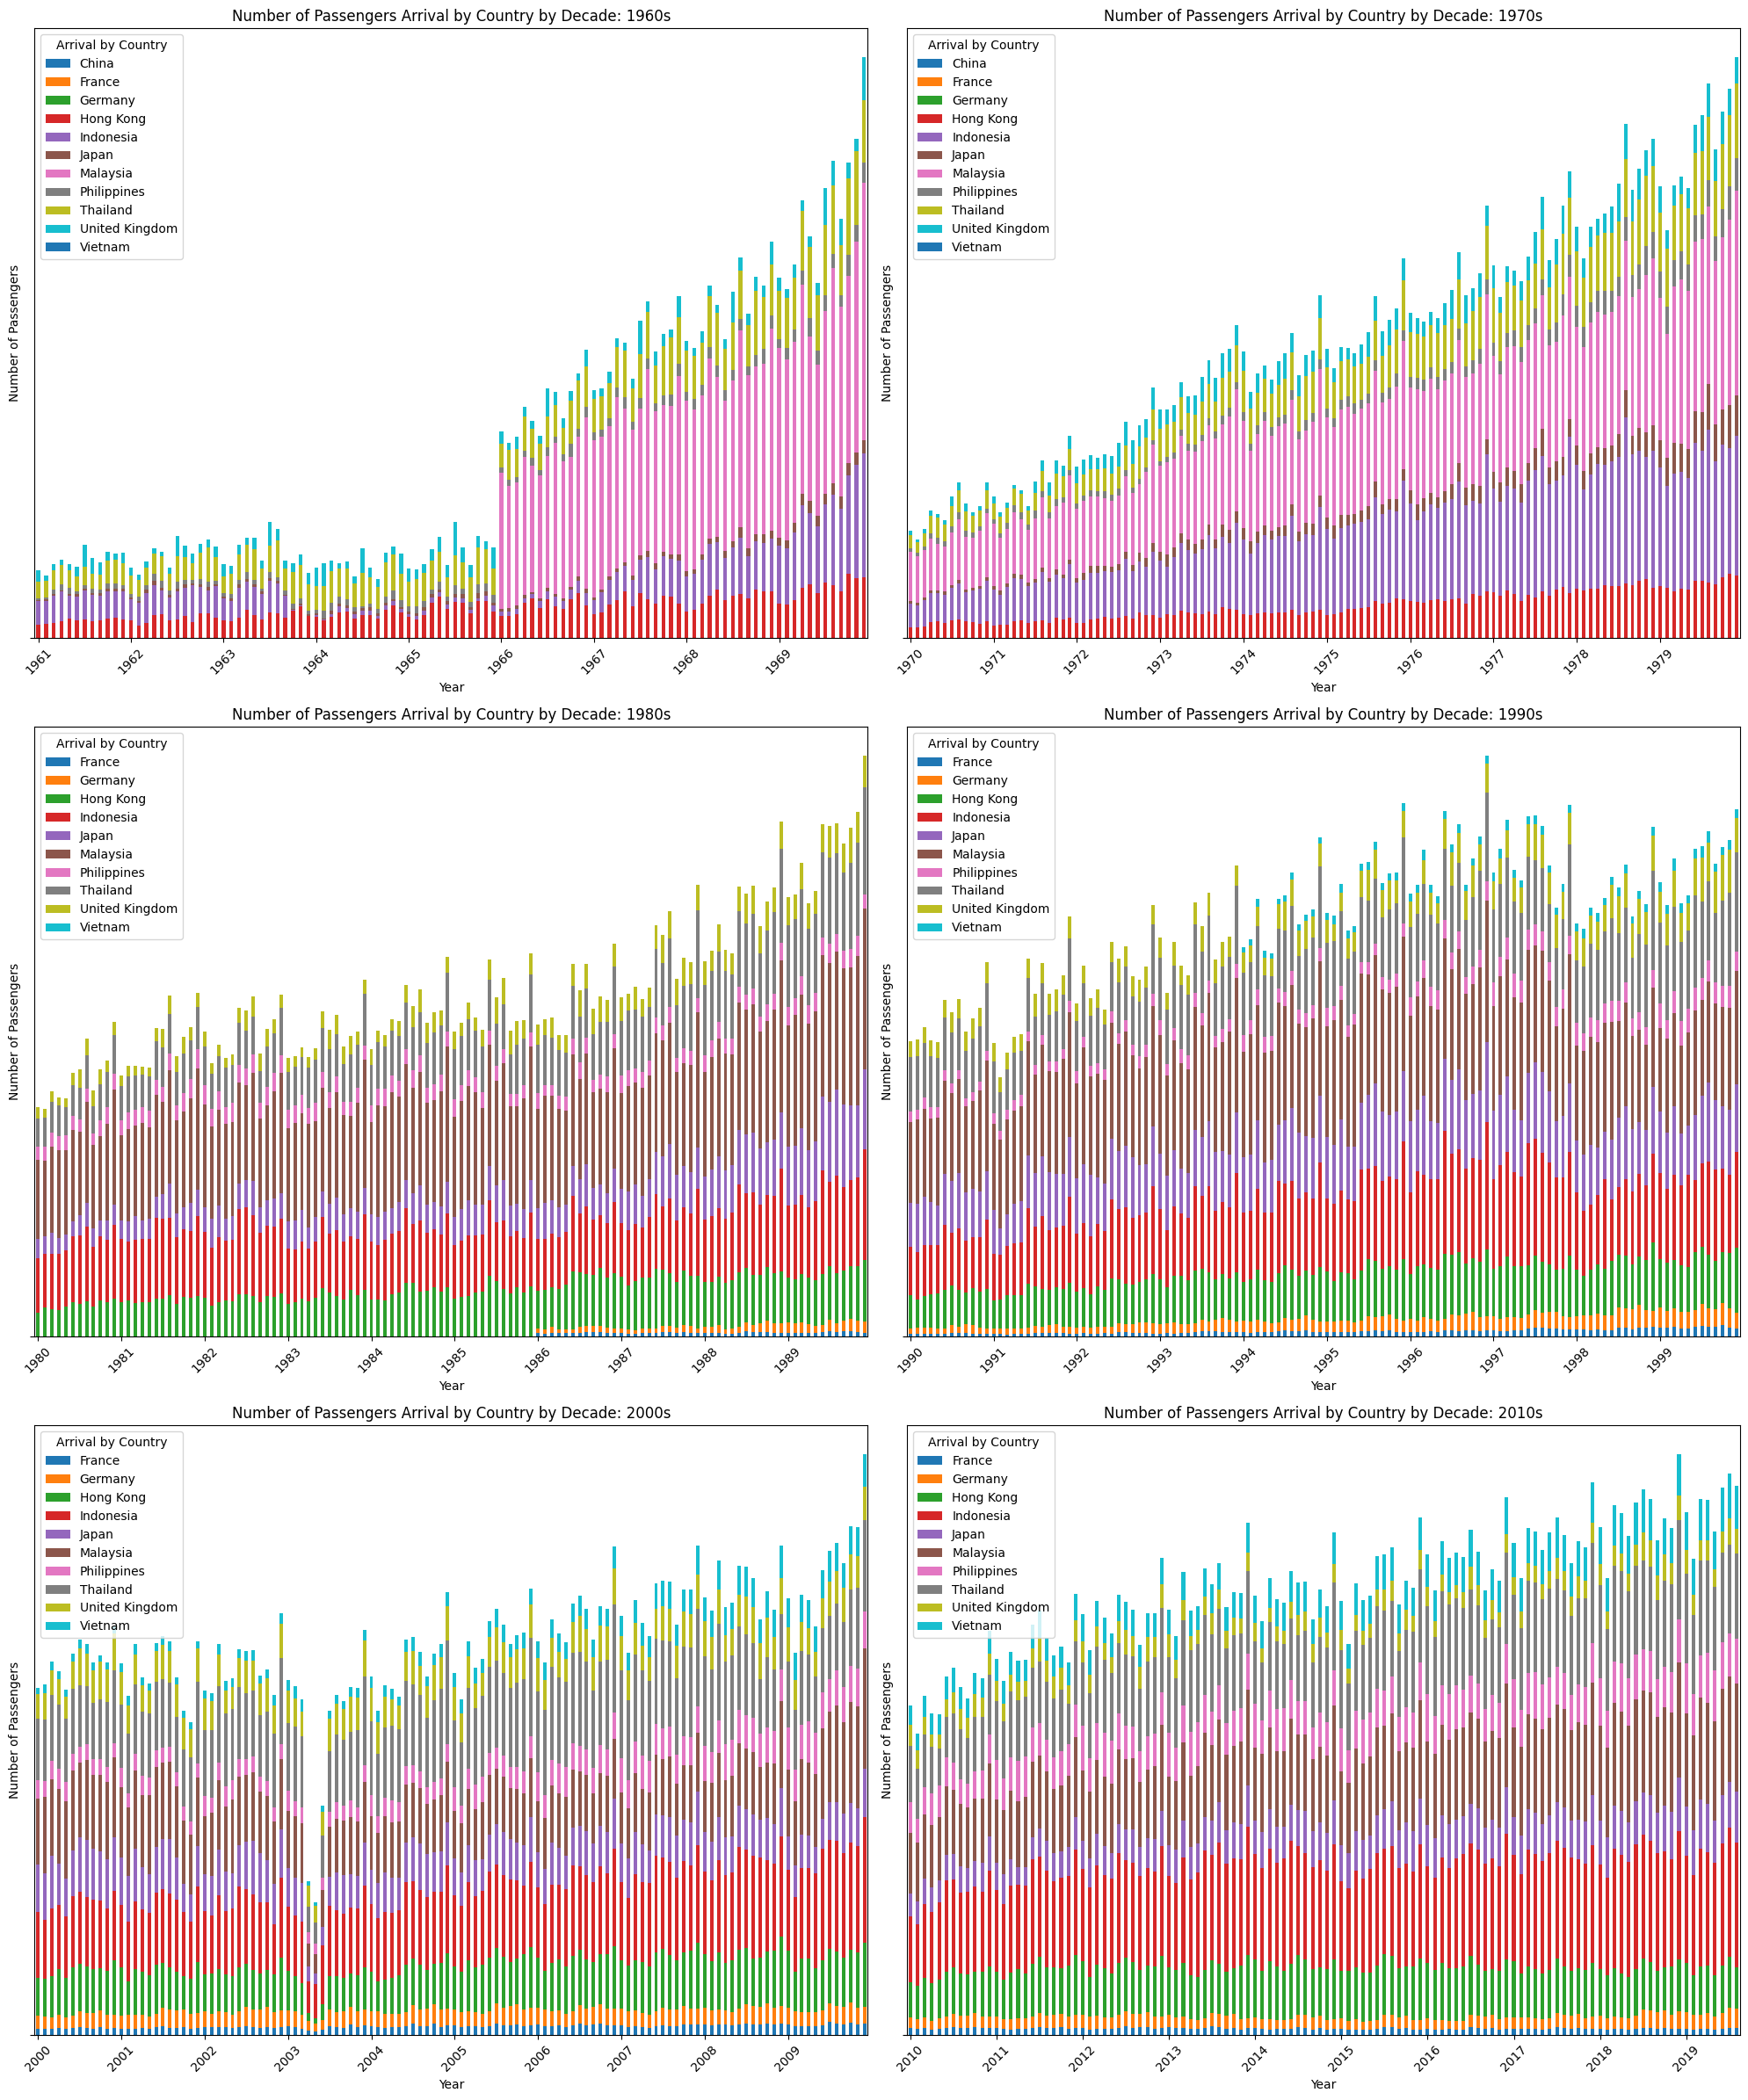

In [18]:
plot_decade_passenger(passengerArrivalbyCountry, 'Arrival by Country')

#### The stacked bar charts of depatures by different countries over the decades

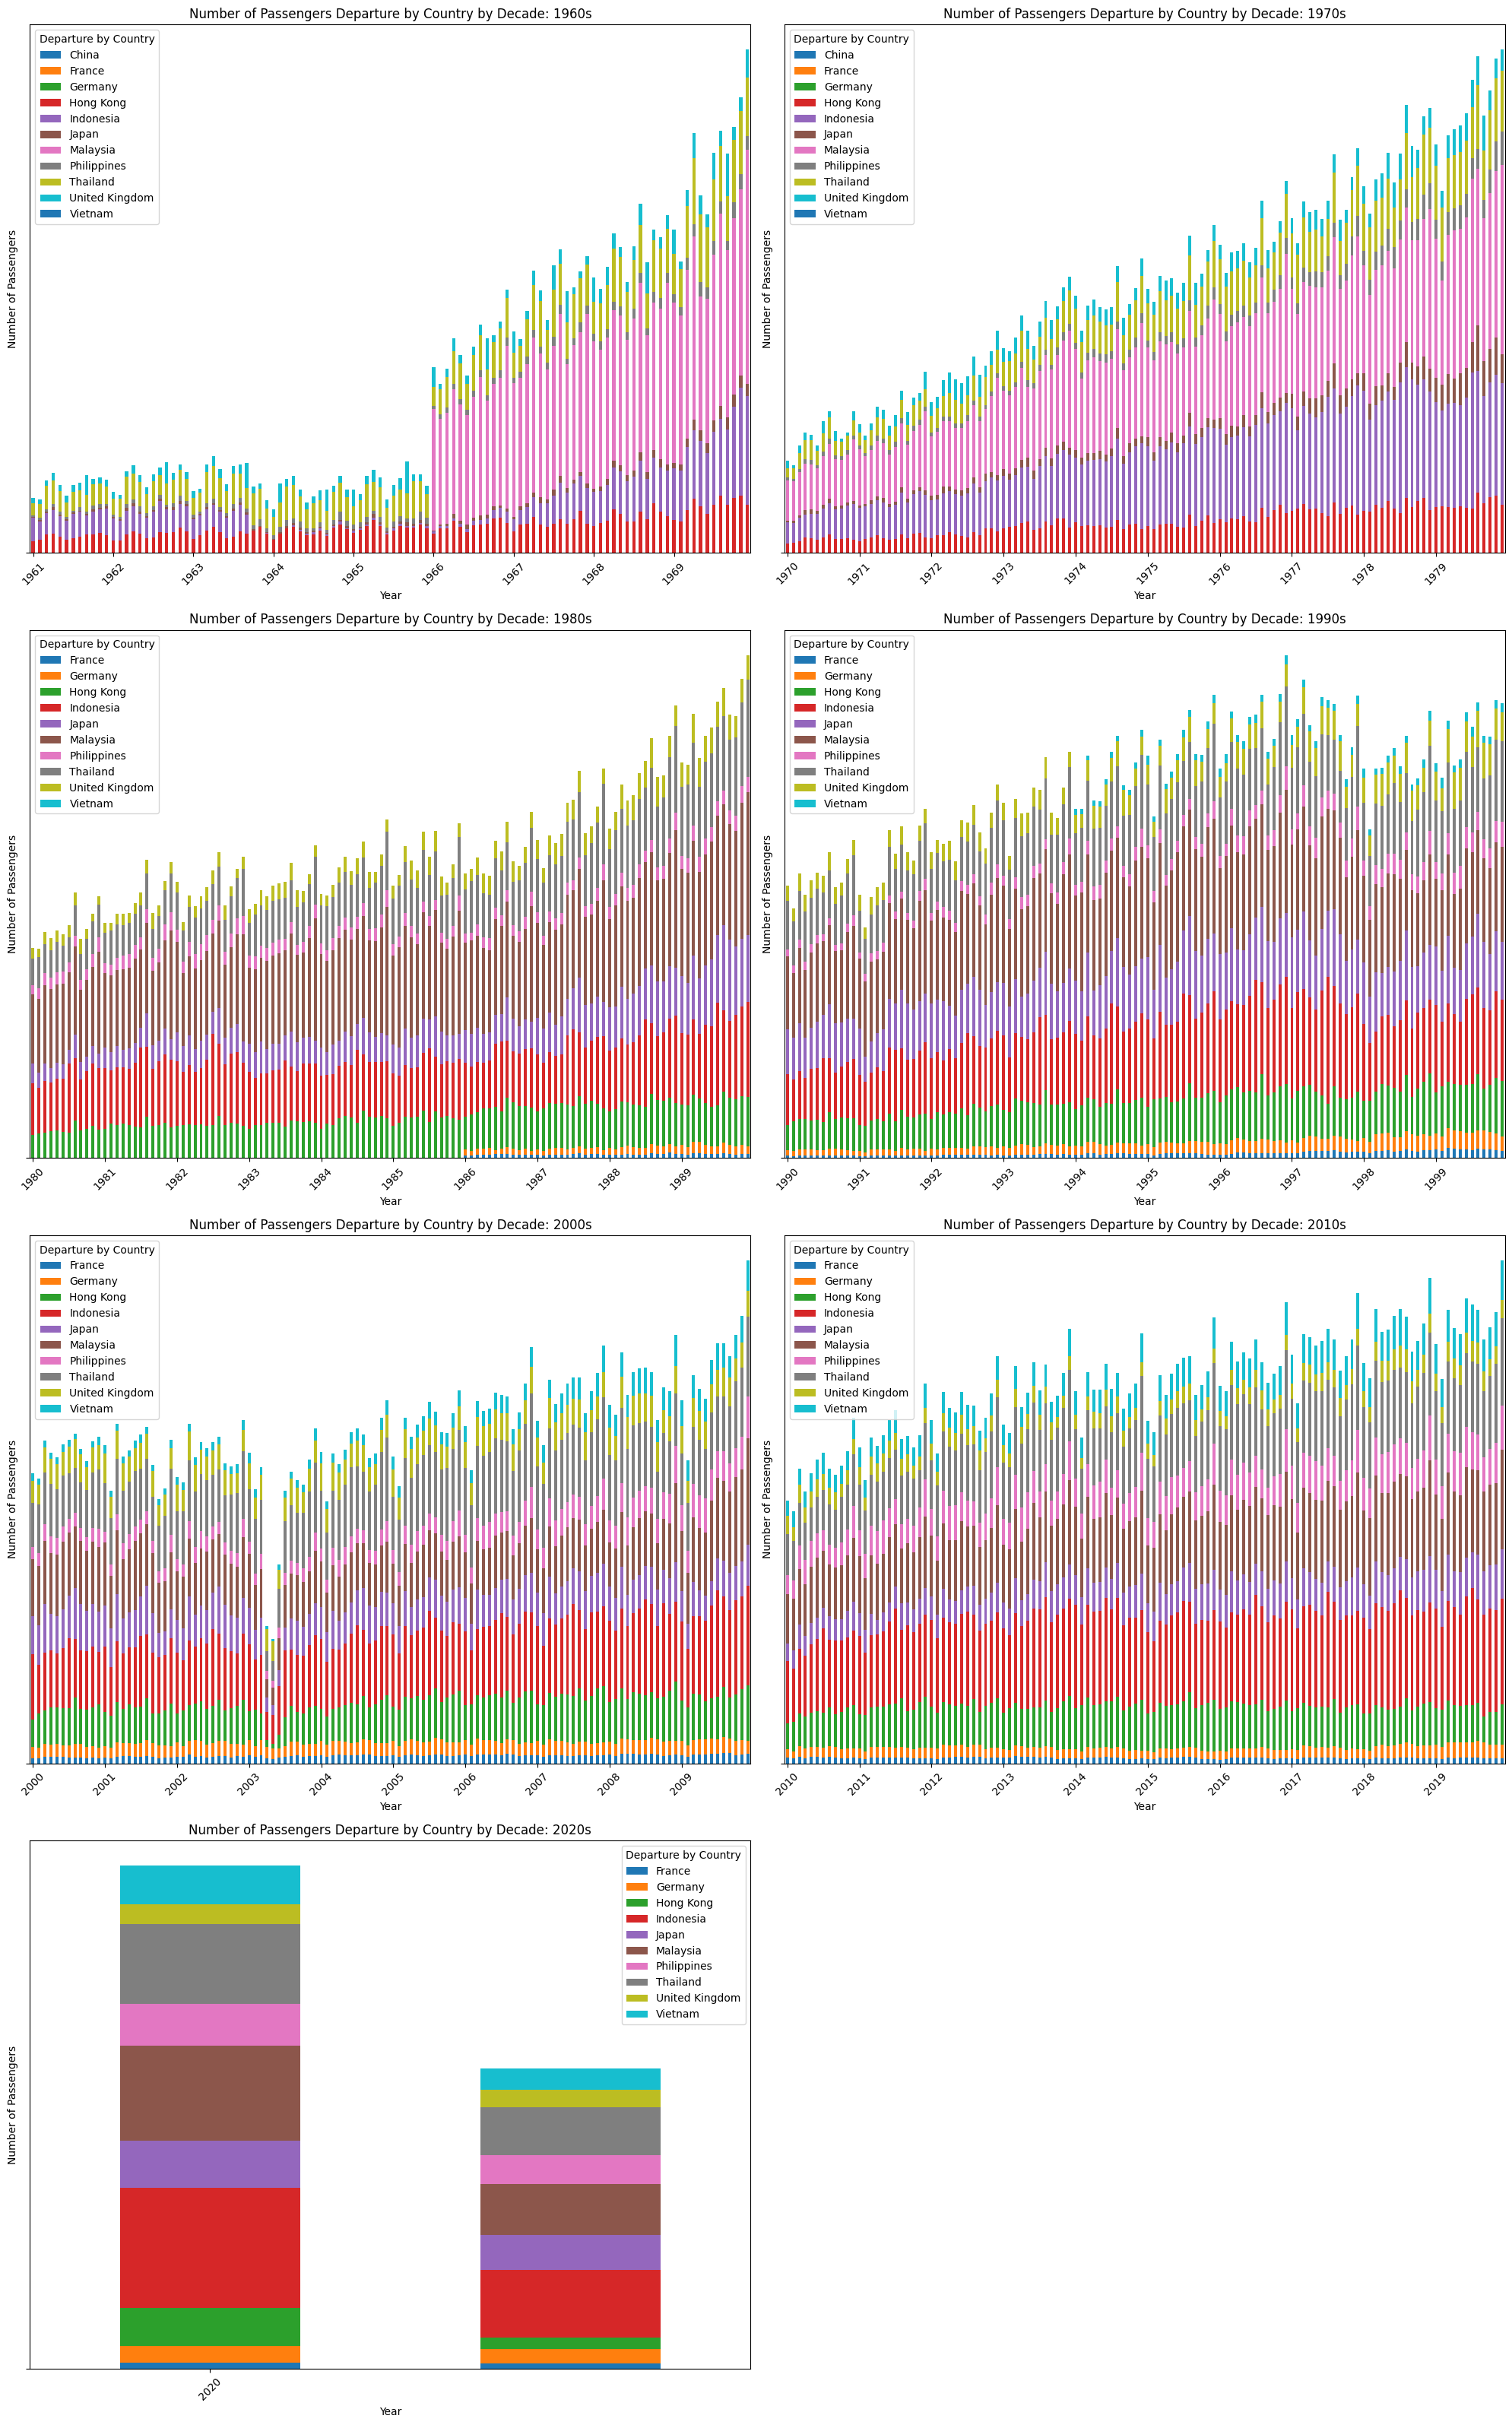

In [19]:
plot_decade_passenger(passengerDeparturenyCountry, 'Departure by Country')

#### The stacked bar charts of arrivals by different regions over the decades

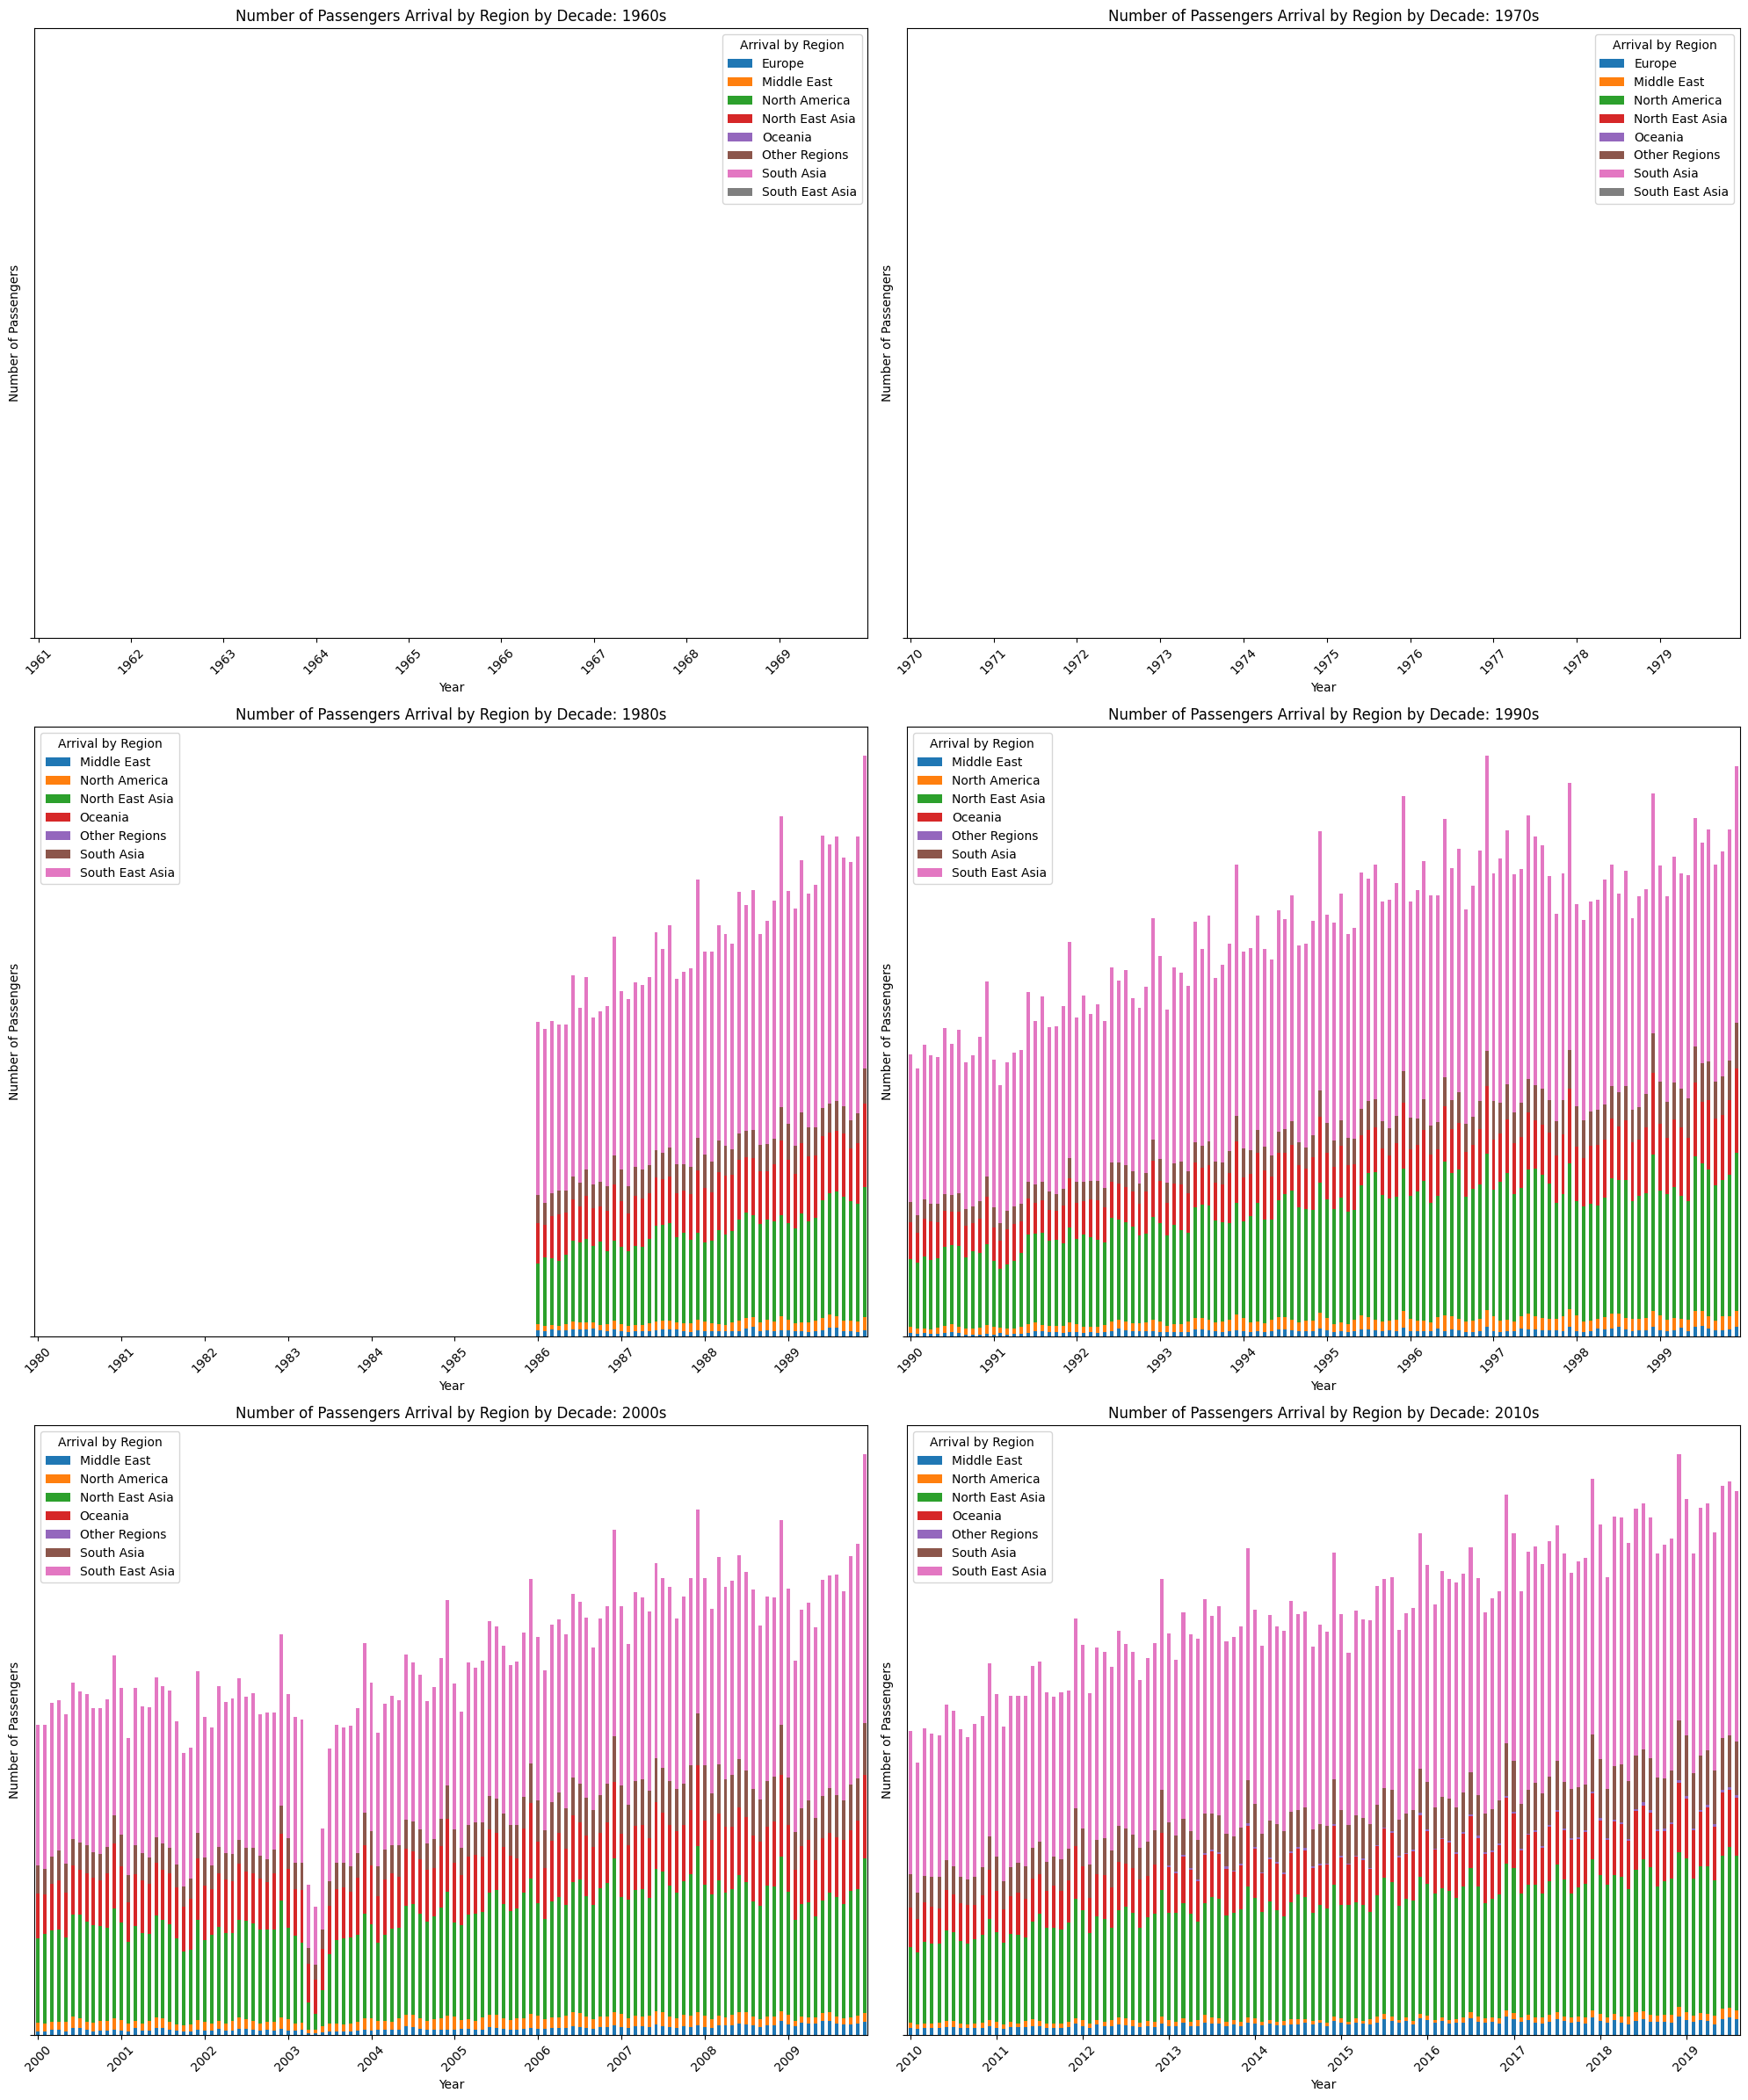

In [20]:
plot_decade_passenger(passengerArrivalbyRegion, 'Arrival by Region')

#### The stacked bar charts of depatures by different regions over the decades

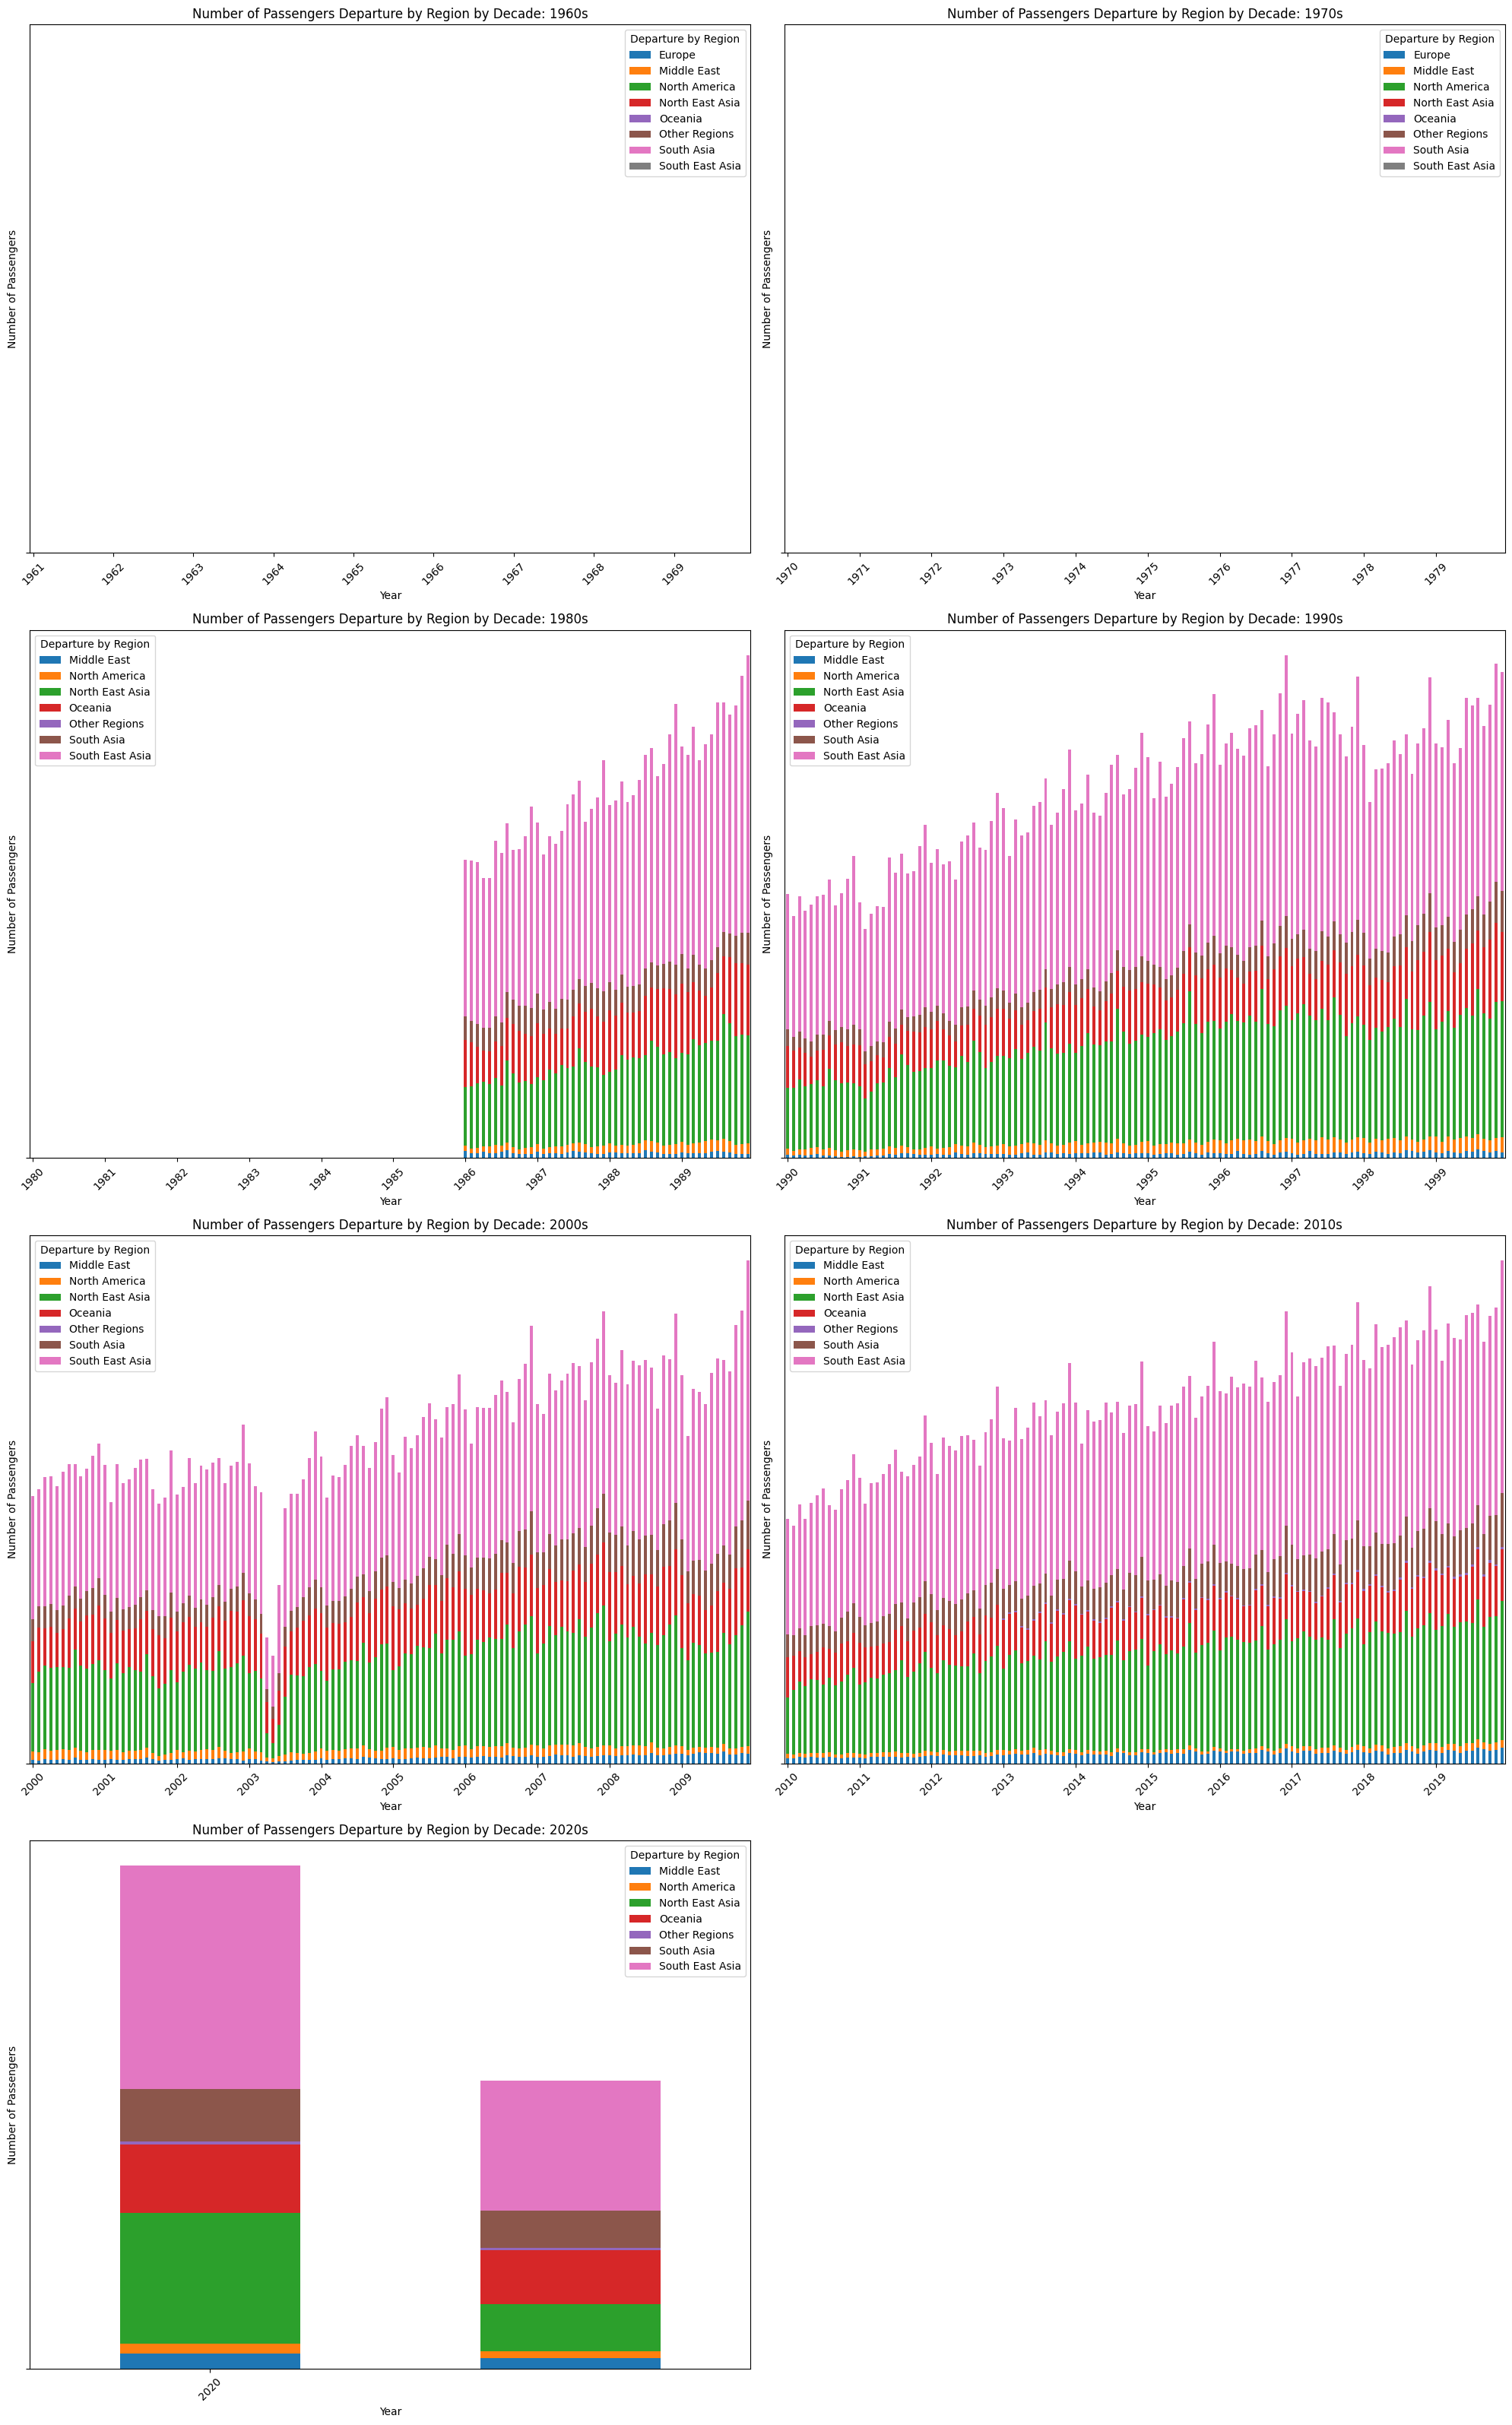

In [21]:
plot_decade_passenger(passengerDeparturebyRegion, 'Departure by Region')

#### Observations from the stacked bar charts
The stacked bar charts reveal several key insights into the patterns of arrivals and departures over the decades. Firstly, we can observe that the number of arrivals and departures from different countries has generally increased over time. However, the relative proportions of each country's contribution to the total arrivals and departures have varied across the decades. Some countries, such as Indonesia and Malaysia, have consistently maintained a significant share, while others have seen their relative contributions rise or fall over time.

Moreover, the stacked bar charts highlight the emergence of new countries as significant contributors to arrivals and departures in recent decades, reflecting changes in travel patterns and global economic shifts. These observations underscore the importance of considering country-specific trends and shifts in the composition of arrivals and departures when analyzing the data.

To further enhance our analysis and predictive modeling efforts, we will incorporate month and season as additional features in task 5, as the data suggests the presence of monthly fluctuations and seasonal trends within each year.

In [22]:
def plot_passenger_data(df_original):
    df=df_original.copy()
    # tranform date type
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    # clean the data
    df.replace('na', 0, inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce', downcast='float')

    # every 10 years
    df['decade'] = (df['year'] // 10) * 10

    # (except 'month', 'year', 'decade'）
    numeric_columns = df.select_dtypes(include='number').columns.difference(['month', 'year', 'decade'])

    for column in numeric_columns:
        if column != 'date':
            unique_decades = df['decade'].unique()
            n_decades = len(unique_decades)
            cols_per_row = 3
            n_rows = (n_decades + cols_per_row - 1) // cols_per_row

            fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(20, 6 * n_rows), constrained_layout=True)
            axes = axes.flatten()

            for idx, (decade, group) in enumerate(df.groupby('decade')):
                # adjust the size
                if group[column].max() <= 1:
                    multiplier = 0.01
                elif group[column].max() >= 1000:
                    multiplier = 0.001
                else:
                    multiplier = 0.05

                sizes = group[column].fillna(0) * multiplier
                sizes = sizes.clip(lower=1, upper=1000)  # keep size between 1-1000

                axes[idx].scatter(
                    group['month'],
                    group['year'],
                    s=sizes,
                    alpha=0.5,
                    label=f'{column} ({decade}s)'
                )
                axes[idx].set_xlabel('Month')
                axes[idx].set_ylabel('Year')
                axes[idx].set_title(f'Passenger depature - {column} from {decade} to {decade + 9}')
                axes[idx].grid(True)
    for ax in axes[n_decades:]:
        ax.set_visible(False)
    del df



###3. Pie Chart

#### Define the function for drawing the pie charts

In [23]:
def plot_decade_pie_charts(df, title_prefix='Total Arrivals by Country'):
    df_copy = df.copy()

    for col in df_copy.columns[1:]:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

    df_copy['date'] = pd.to_datetime(df_copy['date'])
    df_copy.set_index('date', inplace=True)

    df_numeric = df_copy.select_dtypes(include=[np.number])

    df_decade = df_numeric.resample('10AS').sum()

    # Determine the number of rows needed for the subplots
    num_rows = (len(df_decade) + 1) // 2

    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))  # Adjust the size as needed
    axs = axs.flatten()  # Flatten the array of axes for easy iteration
    chart_count = 0

    for i, (index, row) in enumerate(df_decade.iterrows()):
        row = row[row > 0]
        if row.sum() > 0:
            ax = axs[chart_count]
            ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=140)
            ax.set_title(f'{title_prefix}: {index.year}-{index.year + 9}')
            chart_count += 1

    # Hide any unused subplots
    for j in range(chart_count, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()
    del df_copy

#### Pie Chart of Arrival Number by Region

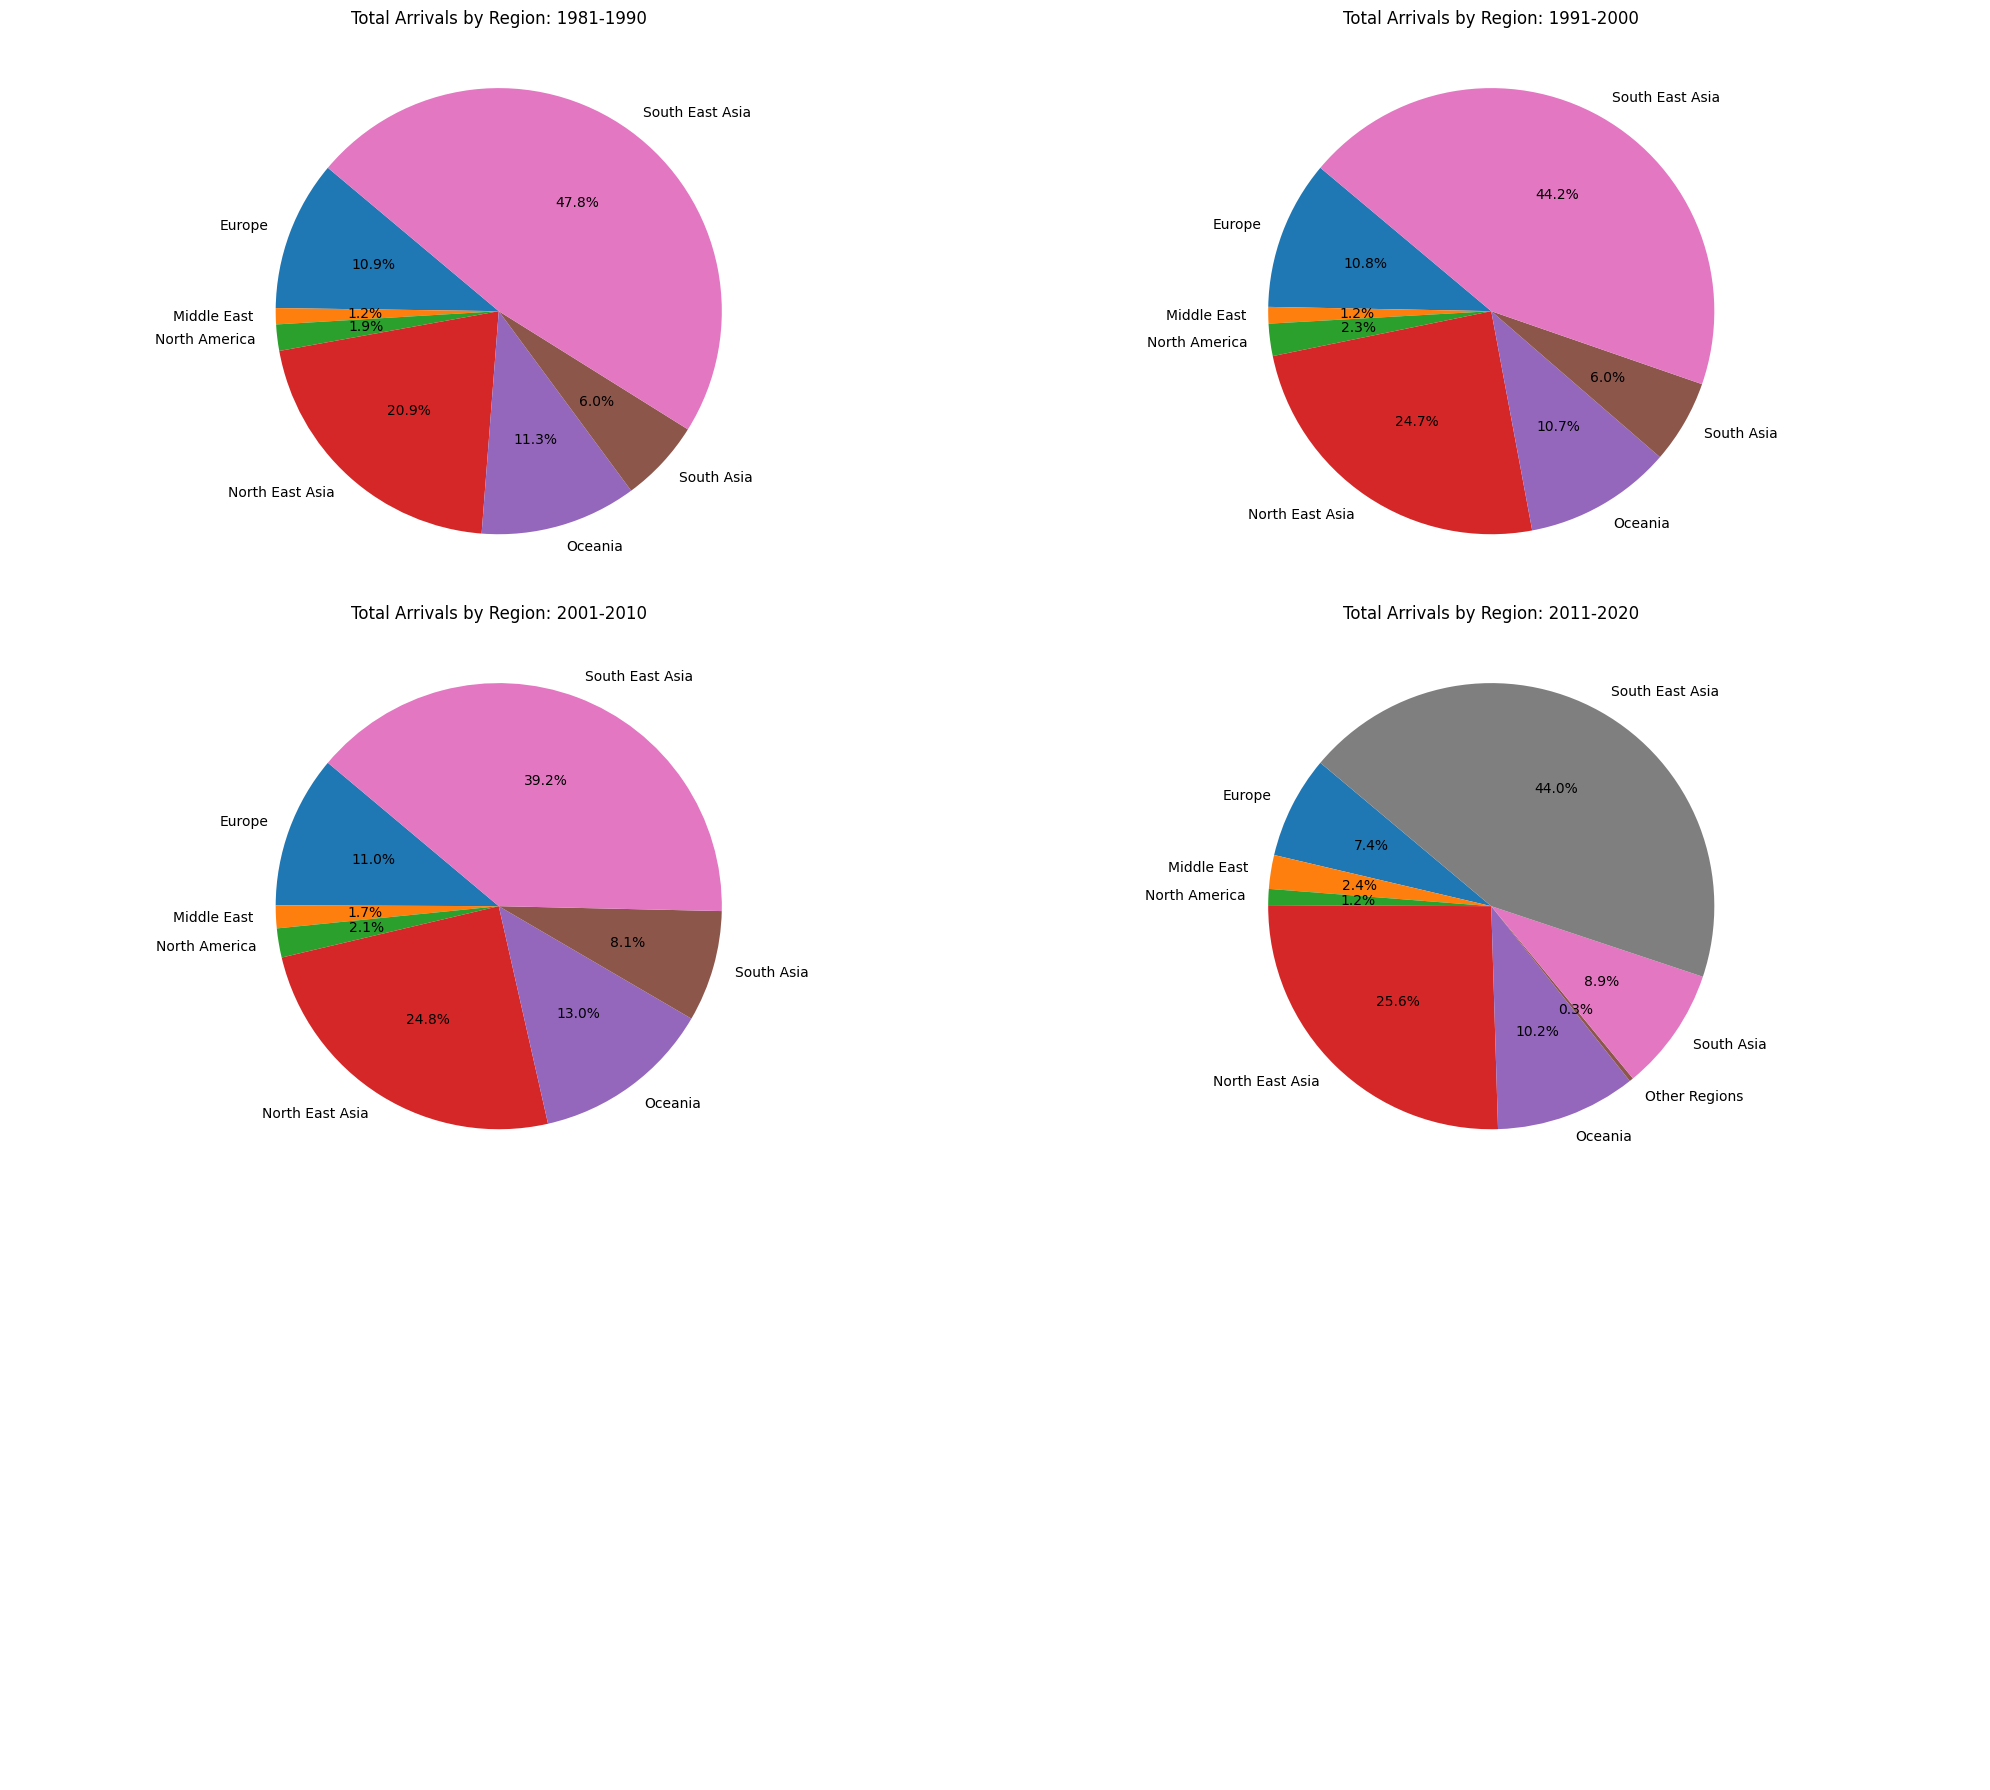

In [24]:
plot_decade_pie_charts(passengerArrivalbyRegion, title_prefix='Total Arrivals by Region')

#### Pie Chart of Departure Number by Region

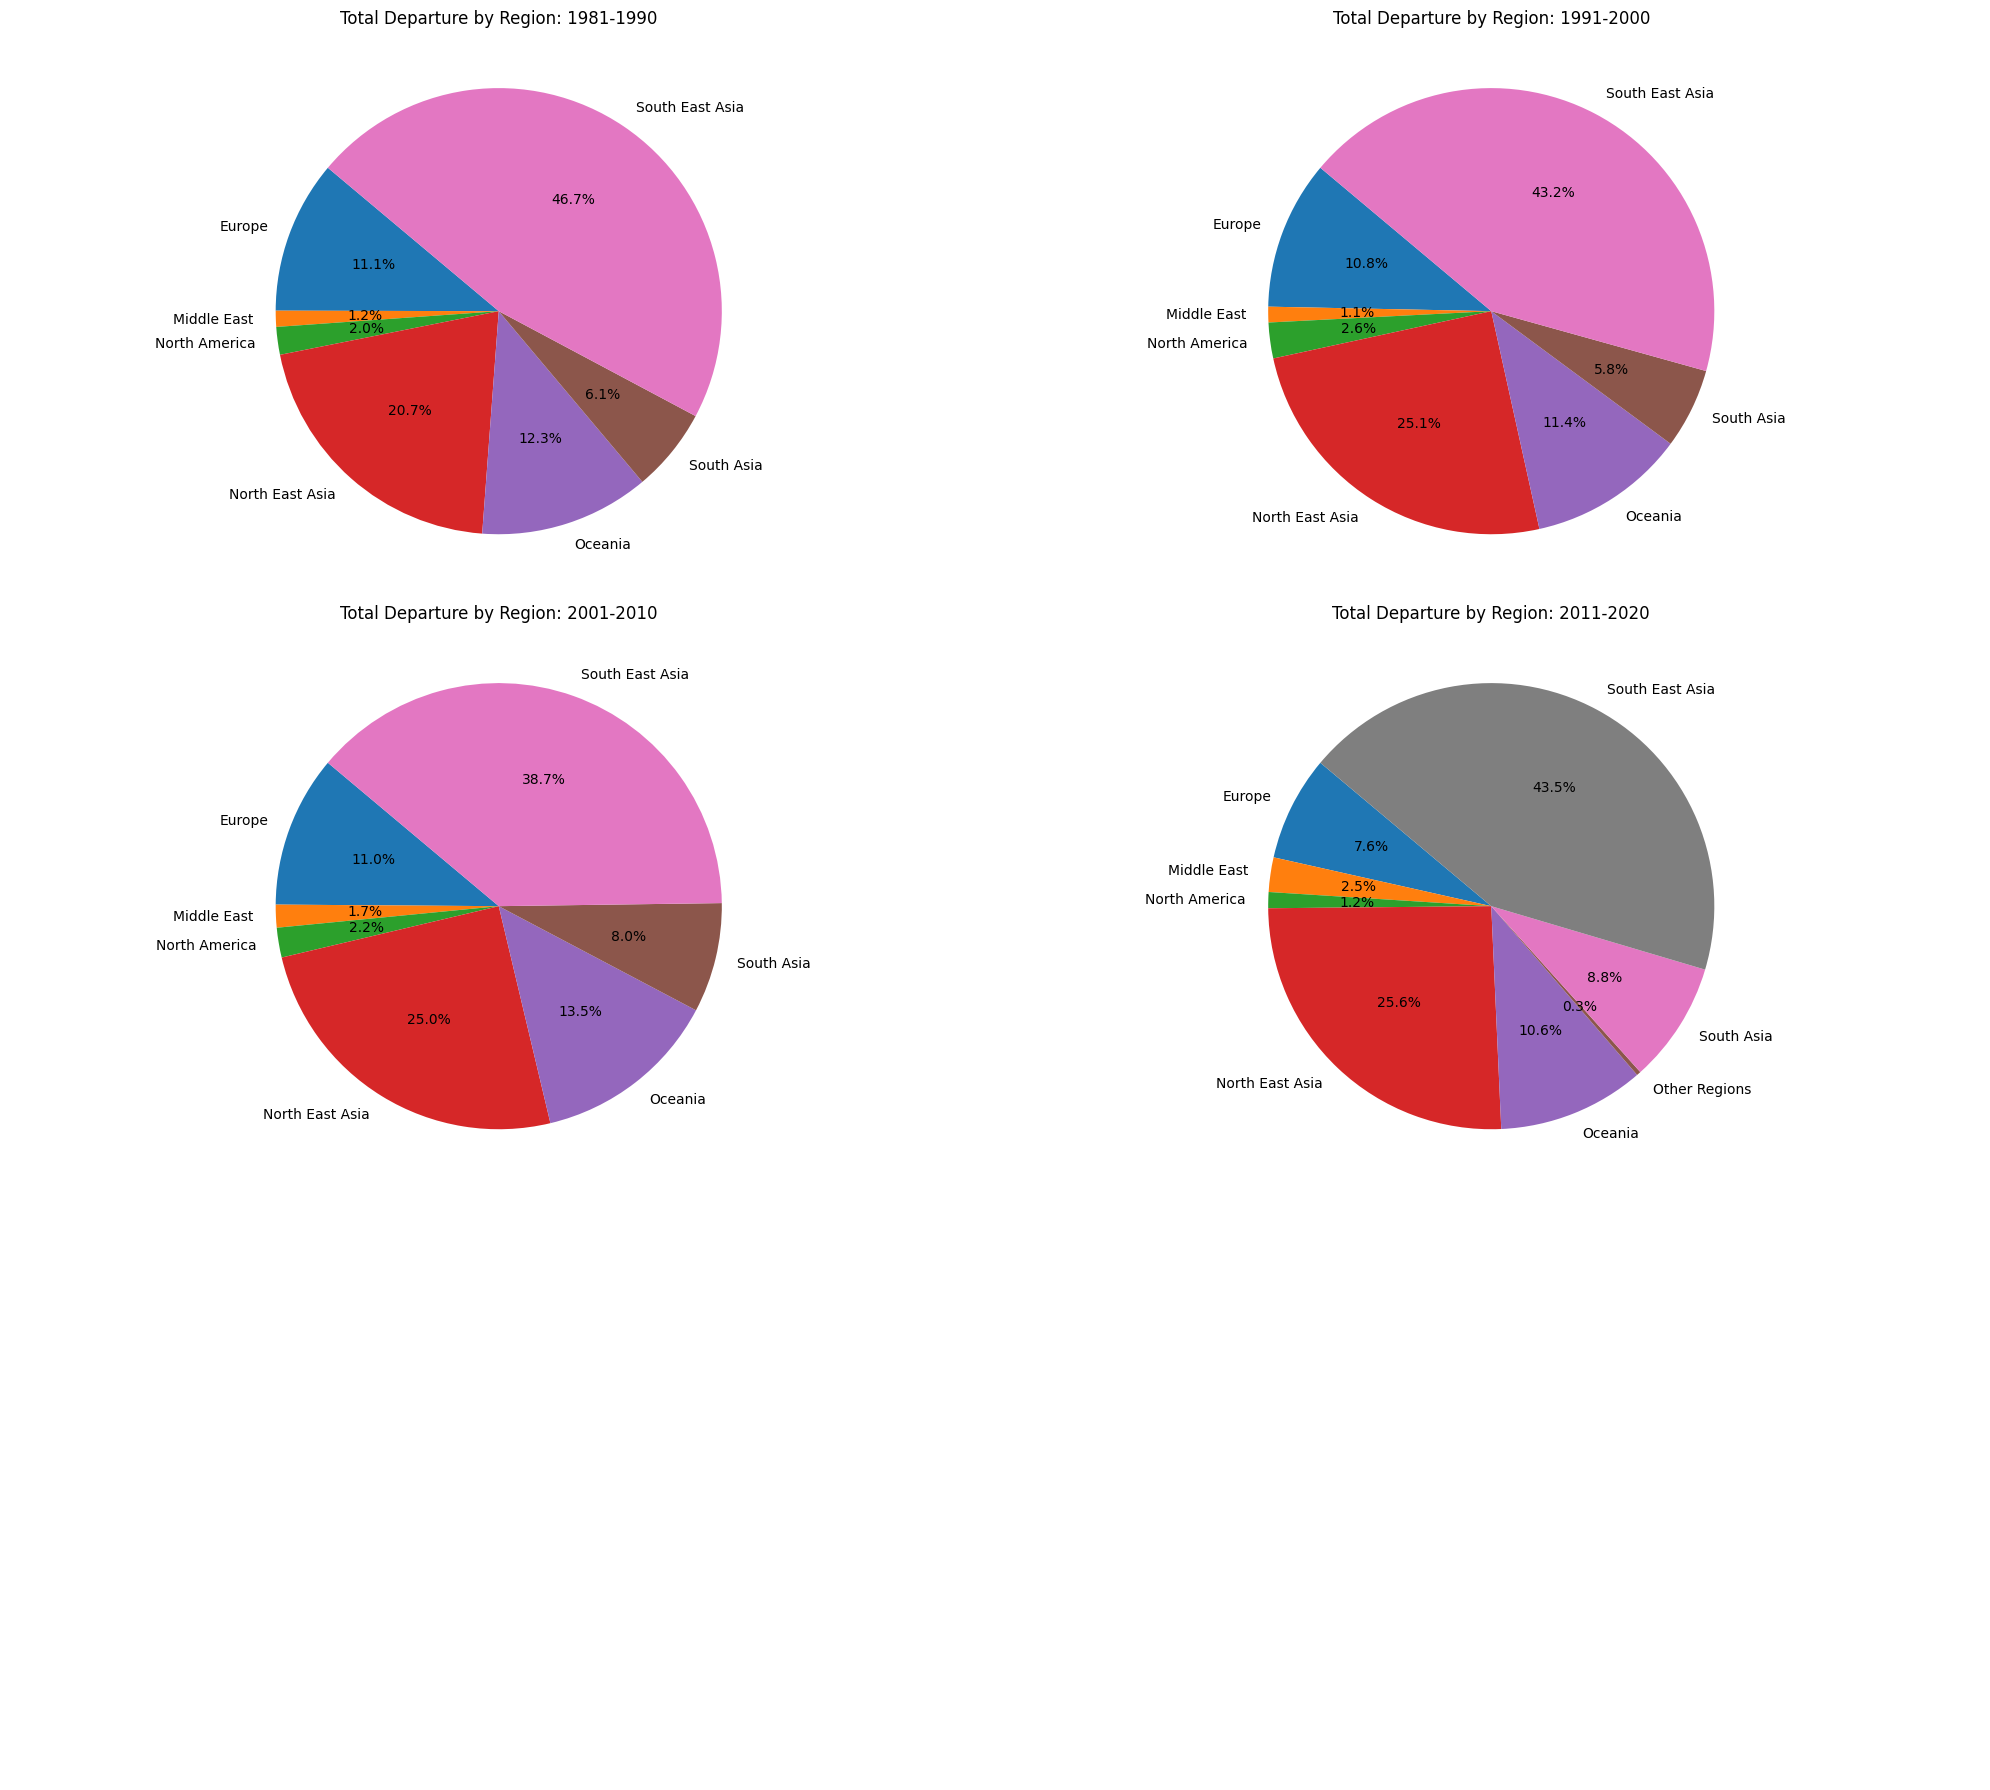

In [25]:
plot_decade_pie_charts(passengerDeparturebyRegion, title_prefix='Total Departure by Region')

#### Pie Chart of Arrival Number by Country

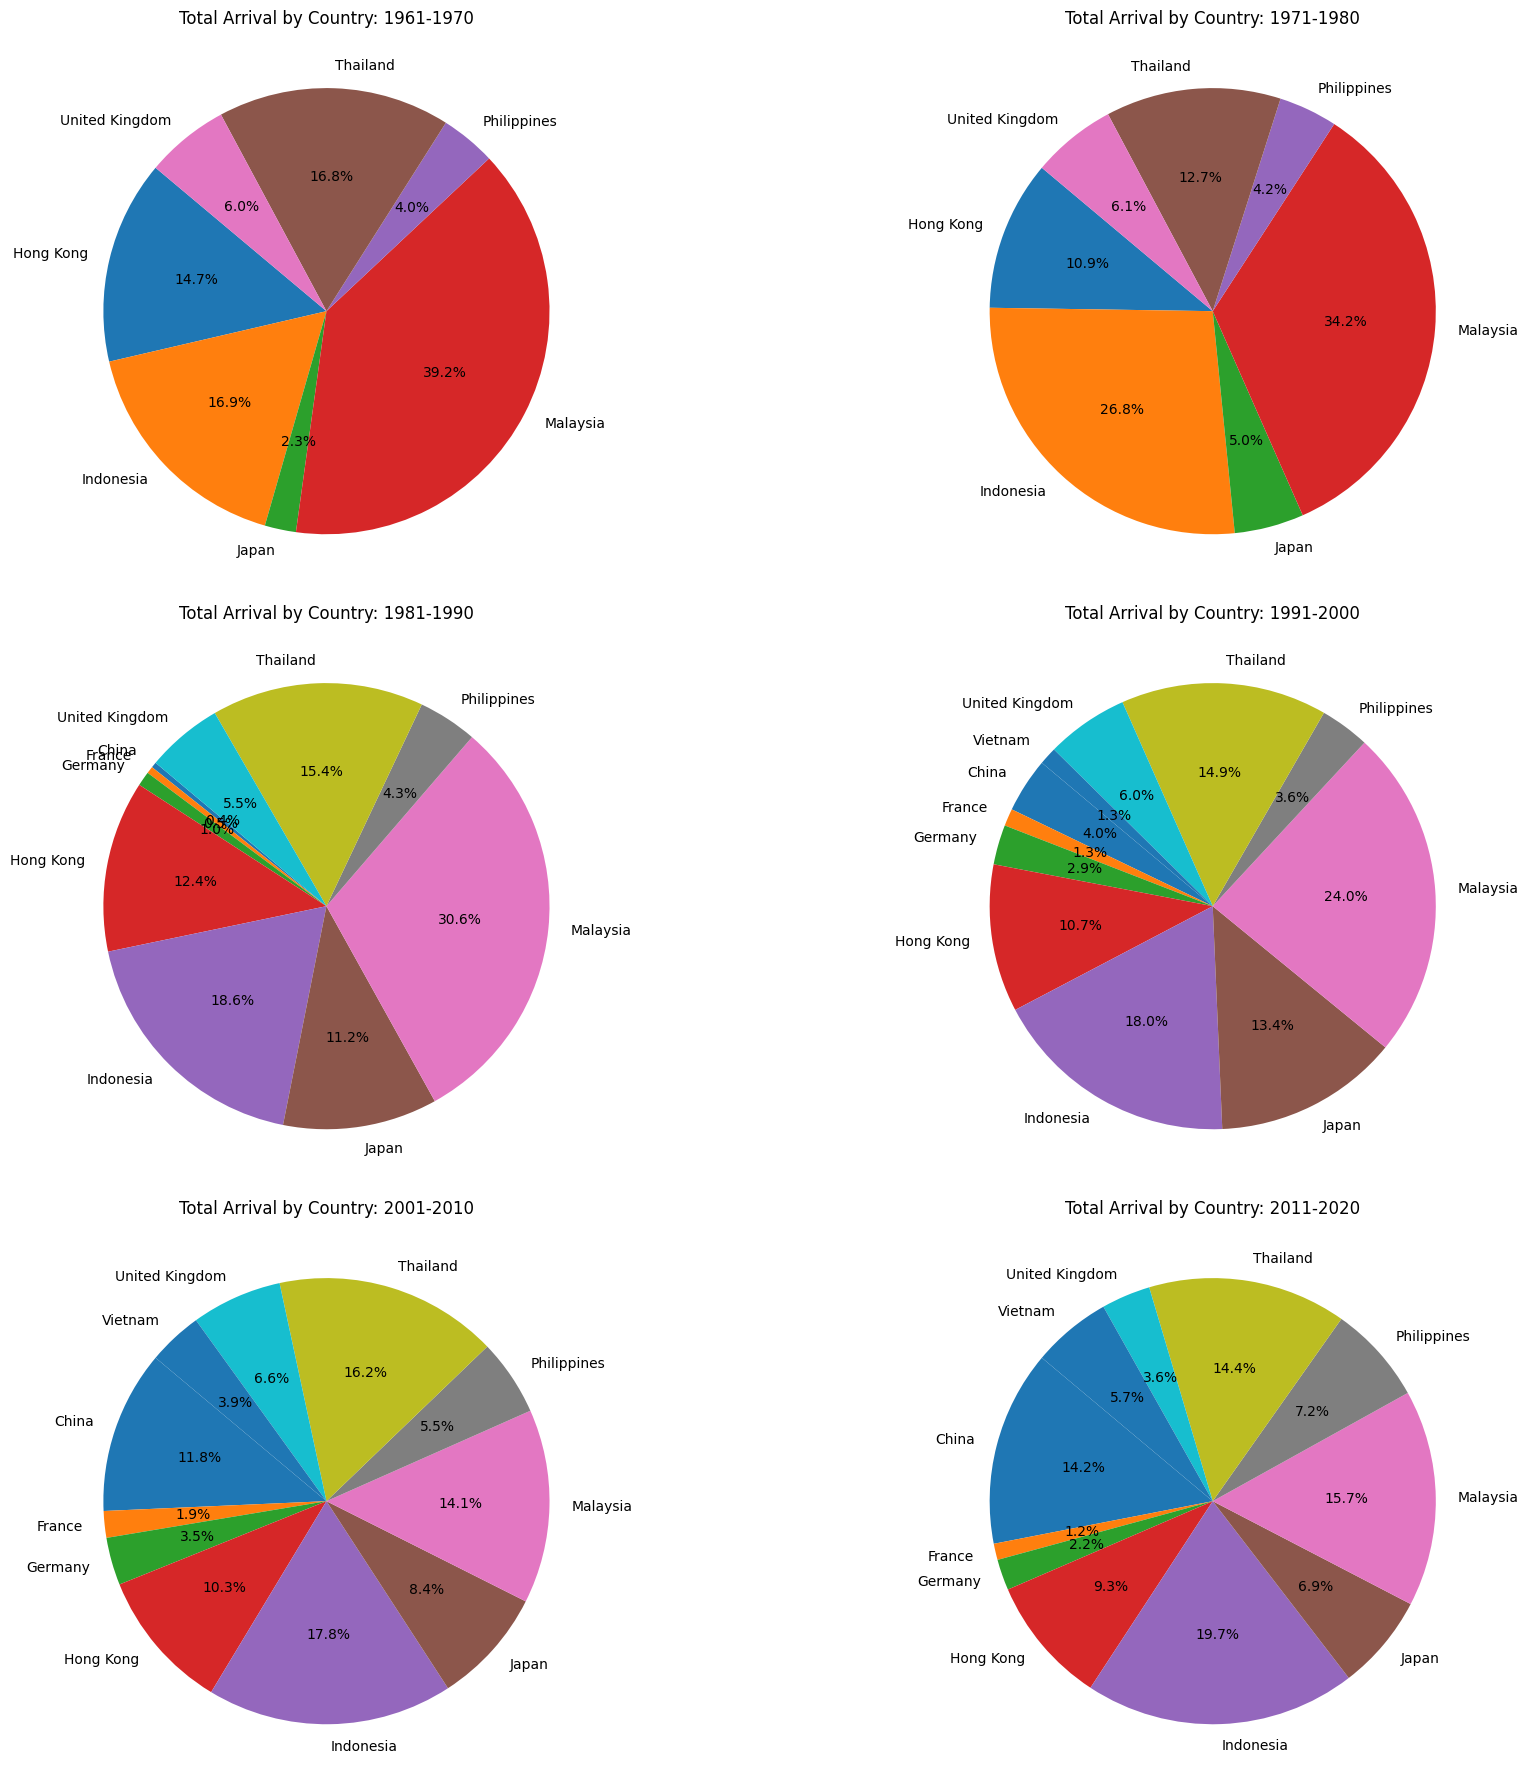

In [45]:
plot_decade_pie_charts(passengerArrivalbyCountry, title_prefix='Total Arrival by Country')

#### Pie Chart of Departure Number by Country

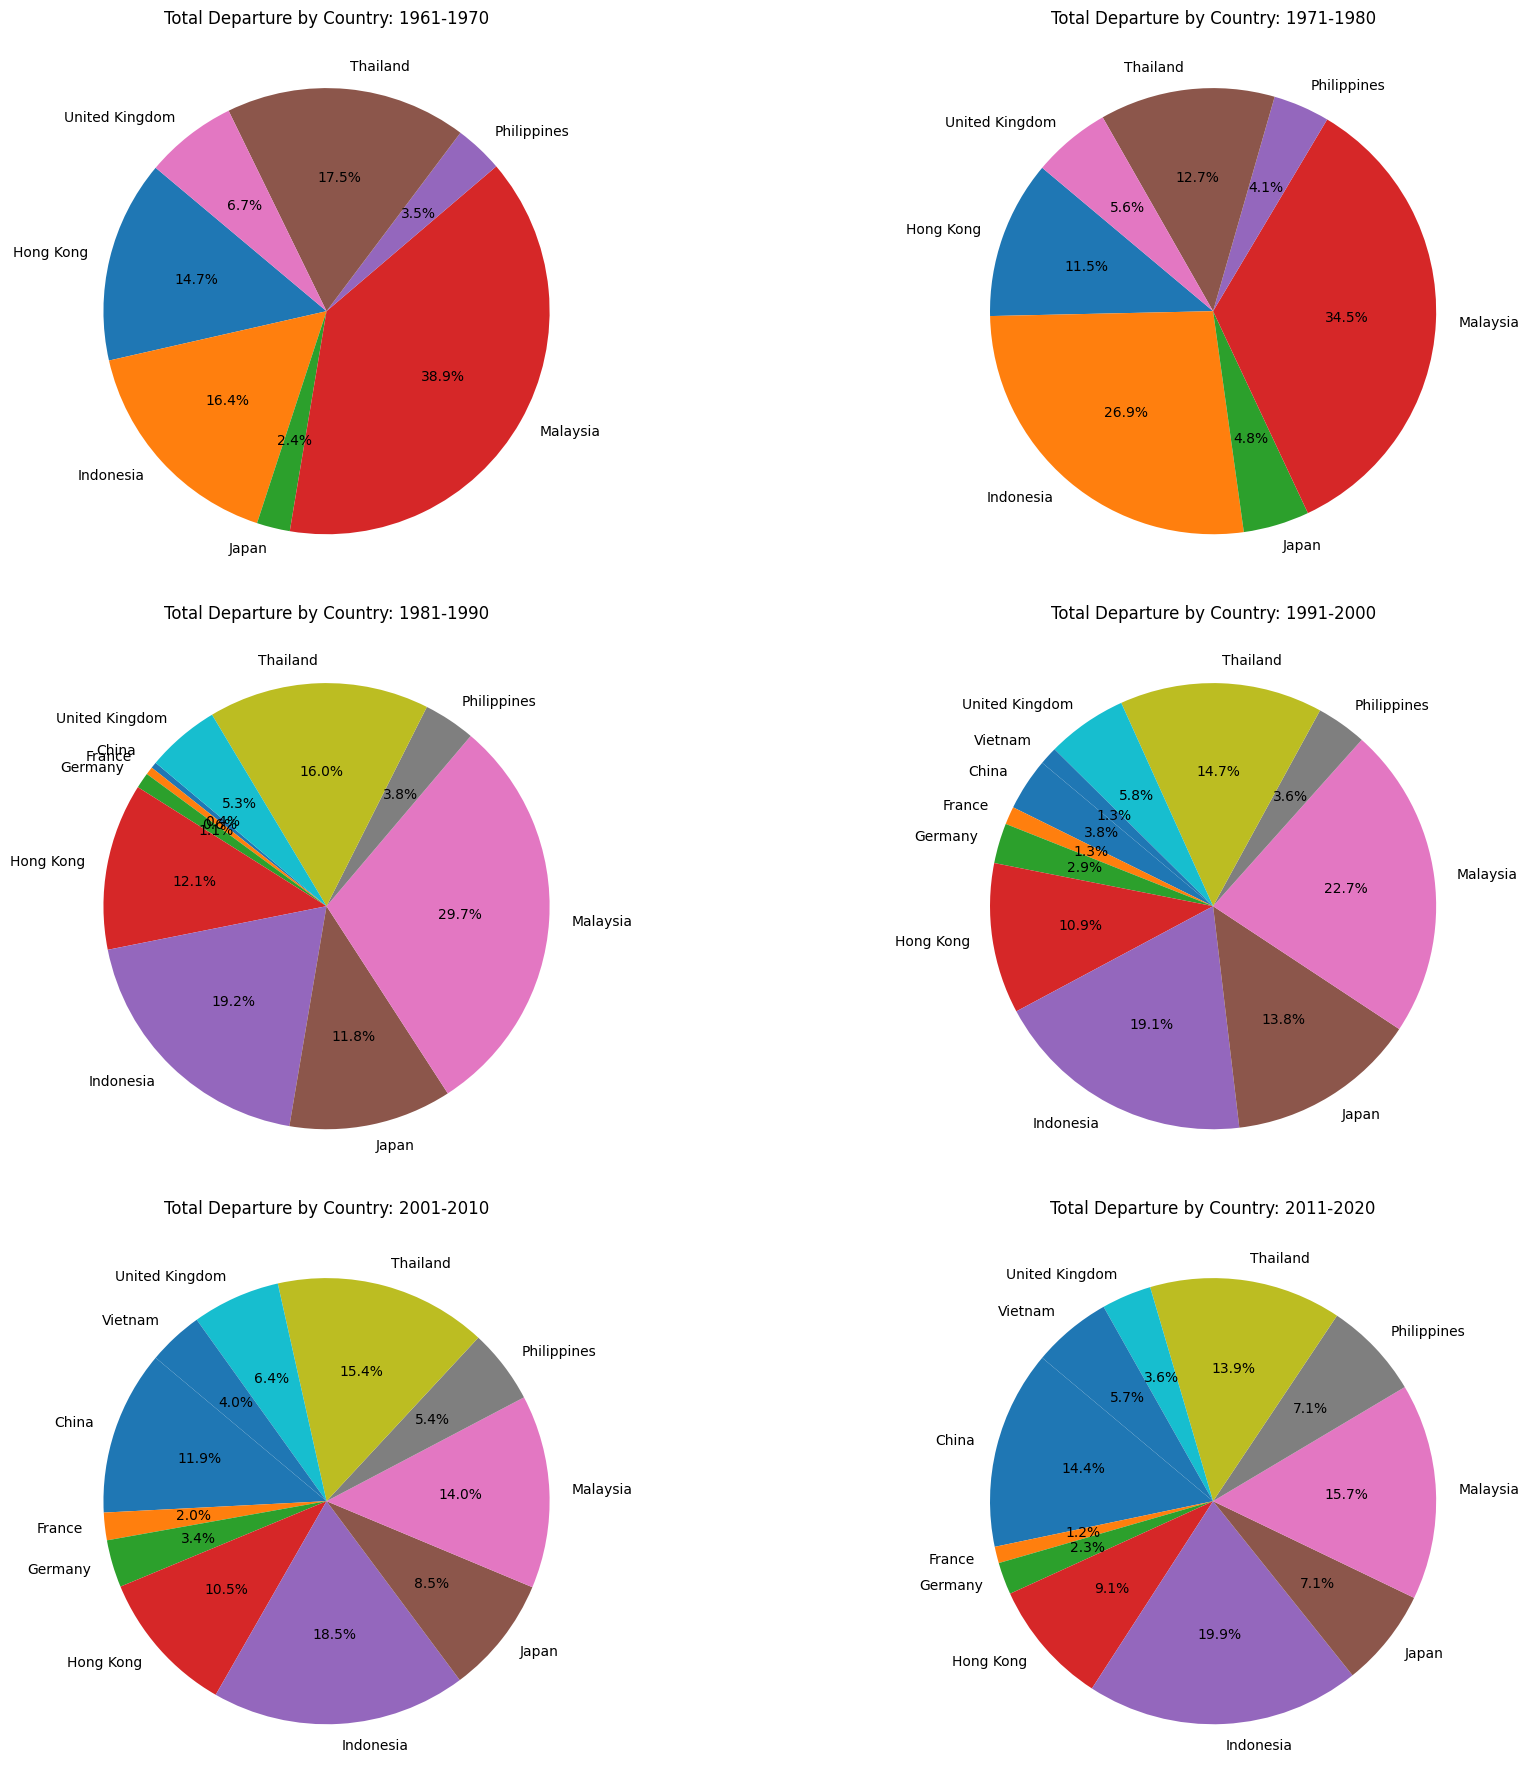

In [27]:
plot_decade_pie_charts(passengerDeparturenyCountry, title_prefix='Total Departure by Country')

### Observations from the pie charts

Asian regions have consistently had a significant share of departures, with countries like Japan, Malaysia, and Indonesia often occupying large portions of the charts. Malaysia, which was the dominant region in the 1971-1980 period, sees its share diminish over time, while Indonesia’s share increases, particularly in the latter two periods.

Japan and Hong Kong show fluctuating departure percentages but remain key players. The Philippines maintains a notable and relatively consistent presence. The United Kingdom and other European countries experience a general decline in their departure shares over these decades. The later charts introduce Vietnam and China as new significant sources of departures, pointing to the broader accessibility of travel and the global shifts towards these regions.


## Task 5: Modeling and visualization
In this section, we focused on predicting the number of departures using various models, including tree-based models, Linear Regression, tree-based models (Random Forest and XGBoost), and the ARIMA model. To train and evaluate these models, we split the datasets into training sets (accounting for 75% of the data) and testing sets (comprising the remaining 25%).

To enhance the predictive performance of the models, we incorporated additional time-related features into the dataset. These features included attributes such as month, year, and season, which captured temporal patterns and seasonality in the data. Furthermore, we included the total cargo loaded and total visitor arrivals as additional predictors, as these variables might have a significant influence on the number of departures.

After training the models, we evaluated their performance using three commonly used metrics: R-squared, Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE). These metrics provided insights into the models' explanatory power, predictive accuracy, and relative error, respectively.

### Time Series Data

Our data is time series data, so we split the whole dataset to training set versus testing set by ordering by date first and then splitting them (approximately the first 75% data will be the training set whereas the last 25% data will be the testing set). It is noticed that cross-validation technique is not applicable in this case.

In [28]:
passengerDeparture=passengerDeparture.sort_values(by='date')
passengerDeparture

date  DepartureTotal  Europe Middle East North America  \
0    1961-01           11355       0           0             0   
1    1961-02           11060       0           0             0   
2    1961-03           12884       0           0             0   
3    1961-04           13162       0           0             0   
4    1961-05           11895       0           0             0   
..       ...             ...     ...         ...           ...   
705  2019-10         2801262  196458       73099         40543   
706  2019-11         2855679  202476       79867         42243   
707  2019-12         3132828  207005       90978         45576   
708  2020-01         2893053  214209       82679         50077   
709  2020-02         1718033  184672       57256         36680   

    North East Asia Oceania Other Regions South Asia South East Asia  ...  \
0                 0       0             0          0               0  ...   
1                 0       0             0          0               0  ...   
2                 0       0             0          0               0  ...   
3                 0       0             0          0               0  ...   
4                 0       0             0          0               0  ...   
..              ...     ...           ...        ...             ...  ...   
705          738593  316132         13514     259852         1163071  ...   
706          733082  291753         12666     285565         1208027  ...   
707          808300  300426         14569     313760         1352214  ...   
708          698679  364406         15299     279969         1187735  ...   
709          250249  289339         10195     198935          690707  ...   

    France Germany Hong Kong Indonesia   Japan Malaysia Philippines Thailand  \
0        0       0       881      1878      71        0         122      919   
1        0       0      1008      1458     121        0         141     1083   
2        0       0      1459      1671      88        0         195     1850   
3        0       0      1489      1841     284        0         233     1836   
4        0       0      1261      1601     115        0         257     1619   
..     ...     ...       ...       ...     ...      ...         ...      ...   
705  16658   47226    110100    350115  147486   271689      120937   248708   
706  17436   47332    110116    343364  155997   276244      134604   267407   
707  17489   47358    136089    357692  167655   336701      150134   295093   
708  17601   50224    113761    358964  141765   284546      123593   238074   
709  15019   44469     33674    201381  105323   152293       87293   142700   

    United Kingdom Vietnam  
0              455       0  
1              367       0  
2              441       0  
3              621       0  
4              492       0  
..             ...     ...  
705          55059  108159  
706          59157  116564  
707          60435  134713  
708          61282  113795  
709          52668   63629  

[710 rows x 21 columns]

### Create more time-related features

Some new features were generated, including year, month, season and ordinalTime from the raw timestamp, in addition to the raw timestamp.

In [29]:
lol=[s.split('-') for s in passengerDeparture.date]
year=[]
month=[]
season=[]
for l in lol:
    year.append(int(l[0]))
    month.append(int(l[1]))
    m=int(l[1])
    if 1<=m<=3:
        season.append(1)
    elif 4<=m<=6:
        season.append(2)
    elif 7<=m<=9:
        season.append(3)
    else:
        season.append(4)
passengerDeparture['year']=year
passengerDeparture['month']=month
passengerDeparture['season']=season
passengerDeparture['Date']=pd.to_datetime(passengerDeparture.date,format='%Y-%m').map(dt.datetime.toordinal)
passengerDeparture

date  DepartureTotal  Europe Middle East North America  \
0    1961-01           11355       0           0             0   
1    1961-02           11060       0           0             0   
2    1961-03           12884       0           0             0   
3    1961-04           13162       0           0             0   
4    1961-05           11895       0           0             0   
..       ...             ...     ...         ...           ...   
705  2019-10         2801262  196458       73099         40543   
706  2019-11         2855679  202476       79867         42243   
707  2019-12         3132828  207005       90978         45576   
708  2020-01         2893053  214209       82679         50077   
709  2020-02         1718033  184672       57256         36680   

    North East Asia Oceania Other Regions South Asia South East Asia  ...  \
0                 0       0             0          0               0  ...   
1                 0       0             0          0               0  ...   
2                 0       0             0          0               0  ...   
3                 0       0             0          0               0  ...   
4                 0       0             0          0               0  ...   
..              ...     ...           ...        ...             ...  ...   
705          738593  316132         13514     259852         1163071  ...   
706          733082  291753         12666     285565         1208027  ...   
707          808300  300426         14569     313760         1352214  ...   
708          698679  364406         15299     279969         1187735  ...   
709          250249  289339         10195     198935          690707  ...   

      Japan Malaysia Philippines Thailand United Kingdom Vietnam  year month  \
0        71        0         122      919            455       0  1961     1   
1       121        0         141     1083            367       0  1961     2   
2        88        0         195     1850            441       0  1961     3   
3       284        0         233     1836            621       0  1961     4   
4       115        0         257     1619            492       0  1961     5   
..      ...      ...         ...      ...            ...     ...   ...   ...   
705  147486   271689      120937   248708          55059  108159  2019    10   
706  155997   276244      134604   267407          59157  116564  2019    11   
707  167655   336701      150134   295093          60435  134713  2019    12   
708  141765   284546      123593   238074          61282  113795  2020     1   
709  105323   152293       87293   142700          52668   63629  2020     2   

    season    Date  
0        1  715876  
1        1  715907  
2        1  715935  
3        2  715966  
4        2  715996  
..     ...     ...  
705      4  737333  
706      4  737364  
707      4  737394  
708      1  737425  
709      1  737456  

[710 rows x 25 columns]

### Include other features
Besides the time-related features, we also included the features that we think may be relevant to the response (total monthly departures) in our models. Through our search, we identified that such candidate features could be the monthly total air-cargo shipment and the monthly total visitor arrivals. We examined their explanatory power in our models.

In [30]:
joindf=passengerDeparture.merge(TotalVisitorInternationalArrivalsMonthly,how='inner',on='date')
passengerDeparture=joindf.merge(TotalAirCargoLoaded,how='inner',on='date')

passengerDeparture.rename(columns={'TotalAirCargoLoaded':'cargoVal'},inplace=True)

del joindf
passengerDeparture

date  DepartureTotal  Europe Middle East North America  \
0    1986-01          359810   36800        7300          6066   
1    1986-02          352936   30527        5205          4706   
2    1986-03          360529   39760        5539          5544   
3    1986-04          346617   43317        6667          6176   
4    1986-05          347740   43760        5565          7091   
..       ...             ...     ...         ...           ...   
354  2015-07         2381169  188412       56286         25037   
355  2015-08         2447055  194539       79057         25291   
356  2015-09         2192314  180285       68238         18704   
357  2015-10         2278858  145806       54084         17037   
358  2015-11         2343936  145849       54437         17077   

    North East Asia Oceania Other Regions South Asia South East Asia  ...  \
0             63298   50977             0      25303          168748  ...   
1             67847   47101             0      22858          173559  ...   
2             70040   38826             0      24508          174895  ...   
3             69177   34334             0      24142          161344  ...   
4             67085   35357             0      25125          161868  ...   
..              ...     ...           ...        ...             ...  ...   
354          597556  275268          8182     187491         1042937  ...   
355          711054  237417          7765     191623         1000309  ...   
356          559018  247171          7363     174815          936720  ...   
357          619567  270237          8070     190911          973146  ...   
358          632055  247138          6984     219549         1020847  ...   

    Philippines Thailand United Kingdom Vietnam  year month season    Date  \
0          7848    35766          13039       0  1986     1      1  725007   
1          6290    42049           9890       0  1986     2      1  725038   
2          8849    40586          14307       0  1986     3      1  725066   
3          8576    36544          15860       0  1986     4      2  725097   
4          9821    35754          15820       0  1986     5      2  725127   
..          ...      ...            ...     ...   ...   ...    ...     ...   
354       97680   217209          57057   98117  2015     7      3  735780   
355      101706   205187          58302   92636  2015     8      3  735811   
356       94948   190939          54134   84213  2015     9      3  735842   
357       99513   219466          41227   81201  2015    10      4  735872   
358      108769   234926          43753   87372  2015    11      4  735903   

    total_international_visitor_arrivals cargoVal  
0                                 262351  10990.0  
1                                 236979  10515.0  
2                                 260497  13279.0  
3                                 245614  13154.0  
4                                 248171  12897.0  
..                                   ...      ...  
354                              1519188  64434.0  
355                              1445052  68677.0  
356                              1131967  70706.0  
357                              1246706  74269.0  
358                              1193906  72643.0  

[359 rows x 27 columns]

### Timeline Split Threshold and The Prediction Object.

We specified the timeline split threshold here (data prior to this threshold is used as the training set, while the rest is used as the testing set) and defined the prediction object - the number of passenger departures by air.

In [31]:
splitYear=2013
splitMonth=1
who_to_pred='DepartureTotal'

In [32]:
if splitMonth<10:
    splitTime=str(splitYear)+'-'+'0'+str(splitMonth)
else:
    splitTime=str(splitYear)+'-'+str(splitMonth)

In [33]:
DF_train=passengerDeparture[passengerDeparture.date<=splitTime]
DF_pred=passengerDeparture[passengerDeparture.date>splitTime]
dfTrain=DF_train[['year','month','season','total_international_visitor_arrivals','cargoVal']+[who_to_pred]]
dfTest=DF_pred[['year','month','season','total_international_visitor_arrivals','cargoVal']+[who_to_pred]]

In [34]:
y_train=dfTrain[who_to_pred]
X_train=dfTrain.drop(who_to_pred,axis=1)
y_test=dfTest[who_to_pred]
X_test=dfTest.drop(who_to_pred,axis=1)
num_train,num_test=len(y_train),len(y_test)

## Linear Regression and Tree-based models

Tree-based models (such as CART) are widely used in Regression and Classification tasks, and enjoy strong advantages like: the ability to handle poorly-preprocessed data (non-scaled, non-encoded, mixture of data types) and the ease in result interpretation/understanding/visualization. However, a single tree might be overfitting, and the variance could be large for different trees generated from the same dataset for the same task. This drawback motivates Ensembling methods, which take two main ideas -- Bagging (e.g., Random Forest) and Boosting (e.g., XGBoost).

We were also interested in the Linear Regression model as well. Using Linear Regression for a dataset whose regressor is solely timestamp was not appropriate, so we also had non-time-related features here in our regressors. Linear Regression thus could be an option, and we wanted to verify its performance. The model performance evaluation metrics we applied were R-squared, RMSE, MAPE, truth-prediction plot, and residual plot (where the first three are w.r.t. the testing set). These metrics altogether gave us a comprehensive understanding of different model performances for this prediction task.

Last but not least, a print-out of the model fitting result was also shown (which highlights feature importance/weight resulting from the fitting phase).

In [35]:
def Dict_Order_by_Values_des(unordered_Dict):
    vs=sorted(set(unordered_Dict.values()),reverse=True)
    v_k={}
    for k,v in unordered_Dict.items():
        try:
            v_k[v]+=[k]
        except:
            v_k[v]=[k]
    ordered_Dict={}
    for i in range(len(vs)):
        for k in v_k[vs[i]]:
            ordered_Dict[k]=unordered_Dict[k]
    return ordered_Dict

###1. Linear Regression
It is the most basic model to examine and capture linear relationship between explanatory variables (all must be numeric and no missing value) and the response variable (must be a real-valued variable). Due to its simplicity, it often serves as baseline model.

['intercept', 'year', 'month', 'season', 'total_international_visitor_arrivals', 'cargoVal']
[-48972445.150238164, 24657.379753785994, 22836.763748714722, -48591.39207562915, 1.1649639081952046, -0.5887714968757791]
{'const': '-48972445.1499', 'year': '24657.3798', 'month': '22836.7637', 'season': '-48591.3921', 'total_international_visitor_arrivals': '1.1650', 'cargoVal': '-0.5888'}
testing set adjusted test R^2: -0.2175919380776925
training set adjusted R^2 score: 0.9882490755661956
testing set RMSE (Root Mean Square Error): 120647.81457432987
training set RMSE (Root Mean Square Error): 47920.1100578983
testing set MAPE: 0.04536422243431431
training set MAPE: 0.042380338788066074


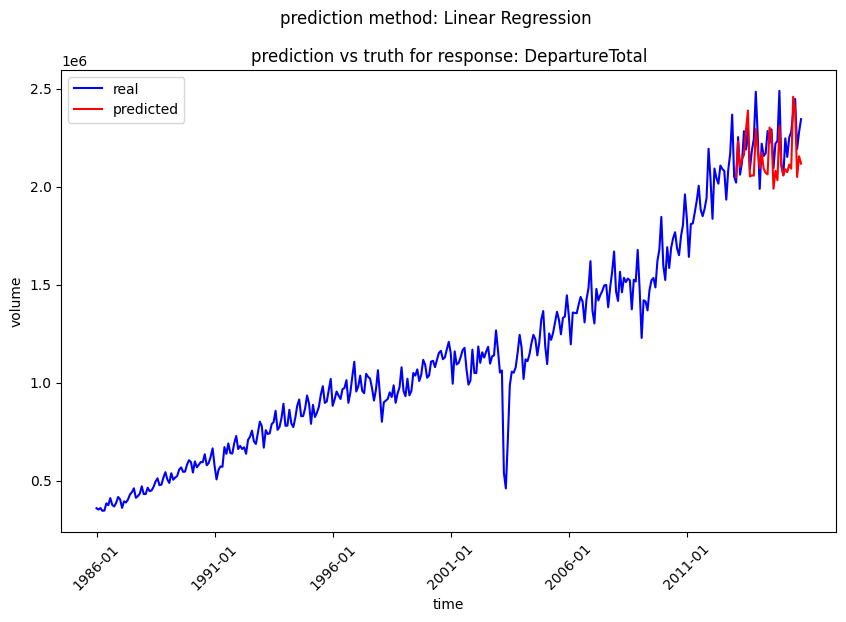

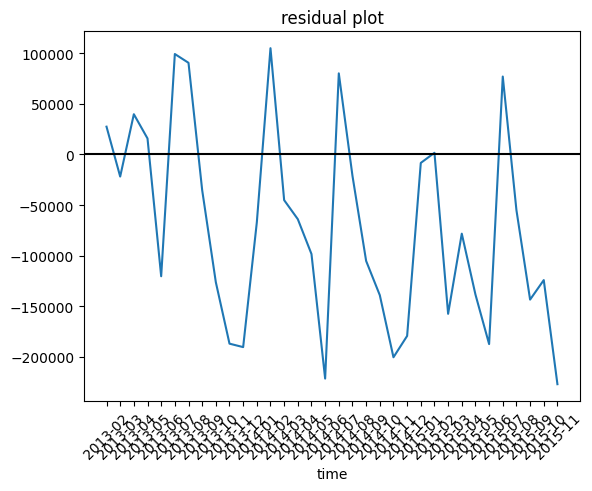

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Ordinary least squares
==============================================================================================================
Model:                             OLS                            Adj. R-squared:                   0.988     
Dependent Variable:                DepartureTotal                 AIC:                              7939.5489 
Date:                              2024-04-26 13:46               BIC:                              7962.2518 
No. Observations:                  325                            Log-Likelihood:                   -3963.8   
Df Model:                          5                              F-statistic:                      5451.     
Df Residuals:                      319                            Prob (F-statistic):               1.89e-306 
R-squared:                         0.988                          Scale:                            2.3395e+09
--------------------------------------------------------------------------------------------------------------
                                         Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
--------------------------------------------------------------------------------------------------------------
const                                -48972445.1499 2821842.4473 -17.3548 0.0000 -54524218.0841 -43420672.2157
year                                     24657.3798    1424.9757  17.3037 0.0000     21853.8420     27460.9175
month                                    22836.7637    3313.9312   6.8911 0.0000     16316.8413     29356.6862
season                                  -48591.3921   10177.5722  -4.7744 0.0000    -68615.0365    -28567.7477
total_international_visitor_arrivals         1.1650       0.0283  41.1928 0.0000         1.1093         1.2206
cargoVal                                    -0.5888       0.3498  -1.6834 0.0933        -1.2769         0.0994
--------------------------------------------------------------------------------------------------------------
Omnibus:                             1.994                     Durbin-Watson:                        1.043    
Prob(Omnibus):                       0.369                     Jarque-Bera (JB):                     2.061    
Skew:                                0.161                     Prob(JB):                             0.357    
Kurtosis:                            2.779                     Condition No.:                        716870233
==============================================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+08. This might indicate                that there are strong
multicollinearity or other numerical                problems.
"""

In [36]:
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

##################################################################################################################

print(['intercept']+model.feature_names_in_.tolist())
print([model.intercept_]+list(model.coef_))

lr=sm.OLS(y_train,sm.add_constant(X_train))
olsres=lr.fit()
tmpdf=pd.read_html(olsres.summary2().as_html())[1]
regress=list(tmpdf.iloc[1:,0])
weight=list(tmpdf.iloc[1:,1])
del tmpdf
Weight_dict={}
for i in range(len(weight)):
    Weight_dict[regress[i]]=weight[i]
# print({k:res[k] for k in Dict_Order_by_Values_des({k:abs(v) for k,v in Weight_dict.items()})})
print(Weight_dict)

r2_test=r2_score(y_test,y_pred)
# print('testing set R^2 score:',r2_test)
print('testing set adjusted test R^2:',1-(1-r2_test)*(num_test-1)/(num_test-len(list(X_test))-1))
r2_train=r2_score(y_train,y_train_pred)
print('training set adjusted R^2 score:',1-(1-r2_train)*(num_train-1)/(num_train-len(list(X_train))-1))

rmse=sqrt(mean_squared_error(y_test,y_pred))
print('testing set RMSE (Root Mean Square Error):',rmse)
rmse_train=sqrt(mean_squared_error(y_train,y_train_pred))
print('training set RMSE (Root Mean Square Error):',rmse_train)

print('testing set MAPE:',mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred))
print('training set MAPE:',mean_absolute_percentage_error(y_true=y_train,y_pred=y_train_pred))





plt.figure(figsize=(10,6))
plt.plot(passengerDeparture.date,passengerDeparture[who_to_pred],color='b',label='real')
plt.plot(DF_pred.date,y_pred,color='r',label='predicted')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('volume')
plt.title('prediction vs truth for response: '+who_to_pred)
plt.suptitle('prediction method: '+'Linear Regression')
plt.legend()
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[::60])
plt.show()



plt.plot(DF_pred.date,y_pred-y_test.to_numpy())
plt.axhline(y=0,color='black')
plt.title('residual plot')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.show()

olsres.summary2()

### Conclusion of Liner Regression Model

The above baseline Linear Regression model gave a decent prediction result (shown by the truth vs prediction curve). It suggested that time-based features were important for the regression (year and month were positively related to y while season was negatively related) and 'total_international_visitor_arrivals' also played some role but did not weigh too much for the Linear Regression (but its weight was statistically significantly different from zero), while 'cargoValue' was not significant (implying that the attribute might have been removed from the regressors of the Linear Regression without changing the model result too much).

### 2. Random Forest

Random Forest is a widely-used Bagging model. It considers many individual decision trees simultaneously and then averages them out. This could lead to a less varied prediction result compared to a single decision tree (as an individual tree might have high variance inherently). Random Forest could also decorrelate each individual tree by applying a feature-set random-sampling mechanism to every partition when constructing a single tree (decorrelation was considered to be good in ensembling).

{'total_international_visitor_arrivals': 0.8474144020909895, 'cargoVal': 0.0840294808544857, 'year': 0.06479258053014937, 'month': 0.003235504164116422, 'season': 0.0005280323602588812}
testing set adjusted test R^2: -1.1648355727861381
training set adjusted R^2 score: 0.998142646631843
testing set RMSE (Root Mean Square Error): 160872.2127178158
training set RMSE (Root Mean Square Error): 19051.494904713796
testing set MAPE: 0.0626491635793572
training set MAPE: 0.01309825943513121


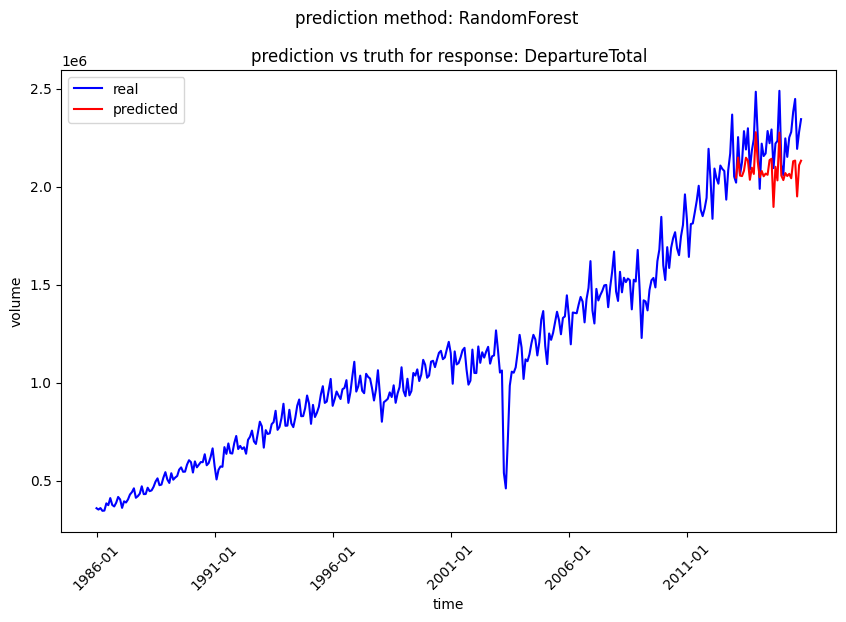

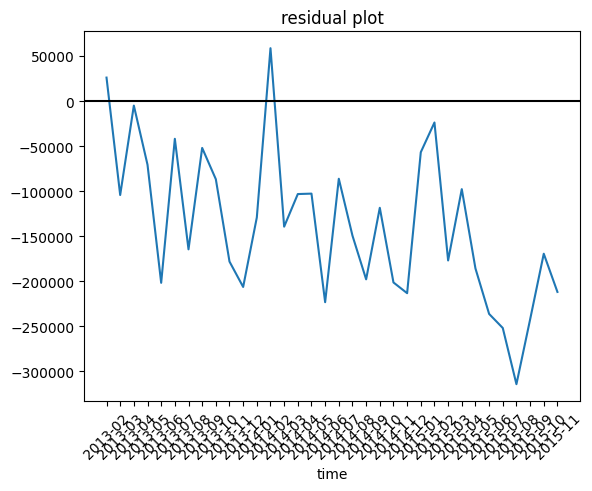

In [37]:
model=RandomForestRegressor().fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)


##################################################################################################################


l1=model.feature_names_in_.tolist()
l2=model.feature_importances_.tolist()
res={l1[i]:l2[i] for i in range(len(l1))}
print({k:res[k] for k in Dict_Order_by_Values_des({k:abs(v) for k,v in res.items()})})

r2_test=r2_score(y_test,y_pred)
# print('testing set R^2 score:',r2_test)
print('testing set adjusted test R^2:',1-(1-r2_test)*(num_test-1)/(num_test-len(list(X_test))-1))
r2_train=r2_score(y_train,y_train_pred)
print('training set adjusted R^2 score:',1-(1-r2_train)*(num_train-1)/(num_train-len(list(X_train))-1))

rmse=sqrt(mean_squared_error(y_test,y_pred))
print('testing set RMSE (Root Mean Square Error):',rmse)
rmse_train=sqrt(mean_squared_error(y_train,y_train_pred))
print('training set RMSE (Root Mean Square Error):',rmse_train)

print('testing set MAPE:',mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred))
print('training set MAPE:',mean_absolute_percentage_error(y_true=y_train,y_pred=y_train_pred))





plt.figure(figsize=(10,6))
plt.plot(passengerDeparture.date,passengerDeparture[who_to_pred],color='b',label='real')
plt.plot(DF_pred.date,y_pred,color='r',label='predicted')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('volume')
plt.title('prediction vs truth for response: '+who_to_pred)
plt.suptitle('prediction method: '+'RandomForest')
plt.legend()
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[::60])
plt.show()



plt.plot(DF_pred.date,y_pred-y_test.to_numpy())
plt.axhline(y=0,color='black')
plt.title('residual plot')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.show()

### 3. XGBoost
XGBoost is a Boosting approach that pursues the goal of variance and bias reduction by sequentially building trees. It gradually enhances the trees' performance from weak to strong by incorporating regularization (to avoid overfitting) and utilizing second-order derivatives to optimize model training, making it a robust and efficient model. XGBoost is well-known for its superior performance across various tasks and scenarios.

{'total_international_visitor_arrivals': 902.0, 'cargoVal': 766.0, 'year': 647.0, 'month': 584.0}
testing set adjusted test R^2: -1.4191794066190568
training set adjusted R^2 score: 0.9999975224620699
testing set RMSE (Root Mean Square Error): 170060.17277391505
training set RMSE (Root Mean Square Error): 695.8120509407515
testing set MAPE: 0.06615752273070298
training set MAPE: 0.000569268396600994


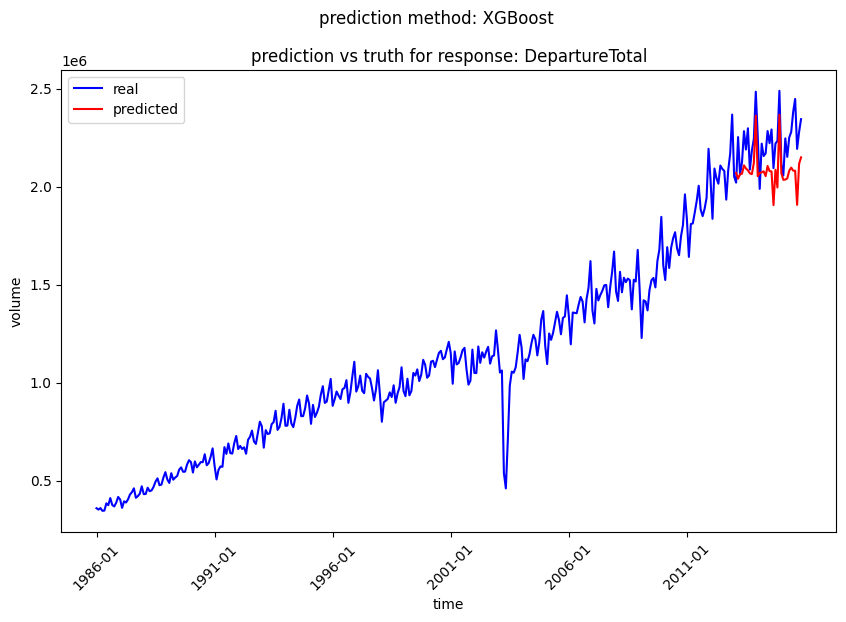

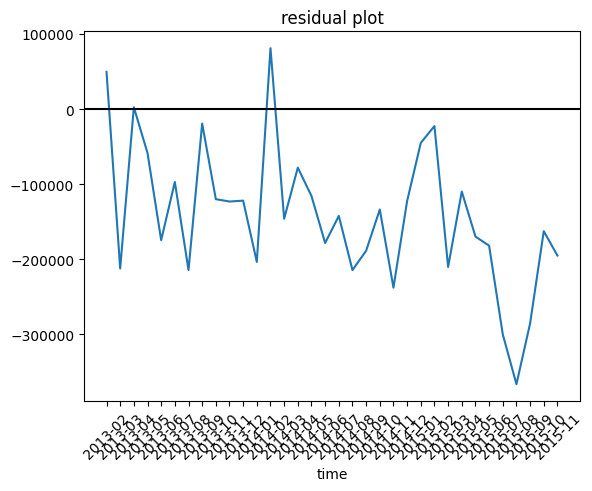

In [38]:
model=xgb.XGBRegressor().fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)


##################################################################################################################


res=model.get_booster().get_score()
print({k:res[k] for k in Dict_Order_by_Values_des({k:abs(v) for k,v in res.items()})})

r2_test=r2_score(y_test,y_pred)
# print('testing set R^2 score:',r2_test)
print('testing set adjusted test R^2:',1-(1-r2_test)*(num_test-1)/(num_test-len(list(X_test))-1))
r2_train=r2_score(y_train,y_train_pred)
print('training set adjusted R^2 score:',1-(1-r2_train)*(num_train-1)/(num_train-len(list(X_train))-1))

rmse=sqrt(mean_squared_error(y_test,y_pred))
print('testing set RMSE (Root Mean Square Error):',rmse)
rmse_train=sqrt(mean_squared_error(y_train,y_train_pred))
print('training set RMSE (Root Mean Square Error):',rmse_train)

print('testing set MAPE:',mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred))
print('training set MAPE:',mean_absolute_percentage_error(y_true=y_train,y_pred=y_train_pred))




plt.figure(figsize=(10,6))
plt.plot(passengerDeparture.date,passengerDeparture[who_to_pred],color='b',label='real')
plt.plot(DF_pred.date,y_pred,color='r',label='predicted')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('volume')
plt.title('prediction vs truth for response: '+who_to_pred)
plt.suptitle('prediction method: '+'XGBoost')
plt.legend()
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[::60])
plt.show()



plt.plot(DF_pred.date,y_pred-y_test.to_numpy())
plt.axhline(y=0,color='black')
plt.title('residual plot')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.show()

### Conclusion for tree-based model above (RandomForest and XGBoost)


 The tree-based models reported very different feature importance compared to Linear Regression. In terms of plotting results and performance metrics, both Random Forest and XGBoost did not outperform Linear Regression, although they were able to capture the general trend and a few sudden peaks. However, for some other samples, their predictions deviated too much from the truth, which made their adjusted R-squared, RMSE, and MAPE worse than Linear Regression (all referring to the testing set). The residual plot for all three models generally fluctuated around the mean with a normal distribution (which is in line with its proper behavior), but both tree-based models tended to underestimate. It can also be seen from the adjusted R-squared, RMSE, and MAPE that all models were overfitting, which can be solved by, for example, increasing the training sample size and/or introducing regularization.

## ARIMA Model
This is the model we want to explore as this is really famous for time series data.

This section is purely for modeling exploration, and because we want to highlight our focus on time-series data, only the original timestamp (yyyy-mm) is used.

ARIMA (AutoRegressive Integrated Moving Average) is a typical model to deal with time-series data (prediction). It incorporates moving average in time-indexed residuals, difference in response $y_t$, and auto-regression in the recent several differences; with these, it strives to capture the trend and dependency in time series.

### ARIMA model is parameterized by $\left(d,p,q\right)$:
### $$ \mathrm{diff}^{d}\left(y_{t}\right)=\mathrm{AR}\left(\underbrace{\mathrm{diff}^{d}\left(y_{t-1}\right),\cdots,\mathrm{diff}^{d}\left(y_{t-p}\right)}_{p}\right)+\mathrm{MA}\left(\underbrace{\epsilon_{t-1},\cdots,\epsilon_{t-q}}_{q}\right)+\epsilon_{t}+c\ \,\,\text{where}\ \begin{array}{c}
\mathrm{AR}\left(\cdot\right)\\
\mathrm{MA}\left(\cdot\right)
\end{array}\ \text{are linear form }\ \text{and} $$
$\mathrm{diff}^{d}\left(y_{t}\right)=\mathrm{diff}\left(\mathrm{diff}^{d-1}\left(y_{t}\right)\right)=\mathrm{diff}\left(\mathrm{diff}\left(\mathrm{diff}^{d-2}\left(y_{t}\right)\right)\right)=\cdots=\underbrace{\mathrm{diff}(\mathrm{diff}(\cdots\mathrm{diff}}_{d}\left(y_{t}\right)))$ where $\mathrm{diff}\left(y_{t}\right)=y_{t}-y_{t-1}$ \& $\mathrm{diff}^{2}\left(y_{t}\right)=\mathrm{diff}\left(y_{t}\right)-\mathrm{diff}\left(y_{t-1}\right)$ so on so forth

In [39]:
model=ARIMA(pd.Series(y_train.tolist(),index=pd.to_datetime(DF_train.date,format='%Y-%m')),order=(1,1,1))
fitted_model=model.fit()
fitted_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  325
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4130.172
Date:                Fri, 26 Apr 2024   AIC                           8266.344
Time:                        13:46:39   BIC                           8277.686
Sample:                    01-01-1986   HQIC                          8270.871
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4174      0.067      6.218      0.000       0.286       0.549
ma.L1         -0.7796      0.052    -15.037      0.000      -0.881      -0.678
sigma2      7.257e+09   4.64e-12   1.56e+21      0.000    7.26e+09    7.26e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               850.30
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               6.39   Skew:                            -1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.61e+37. Standard errors may be unstable.
"""

In [40]:
arimaDF=fitted_model.get_forecast(steps=num_test).summary_frame()
arimaDF

y                   mean        mean_se  mean_ci_lower  mean_ci_upper
2013-02-01  2.080211e+06   85185.430729   1.913250e+06   2.247171e+06
2013-03-01  2.092251e+06  101038.473602   1.894219e+06   2.290283e+06
2013-04-01  2.097277e+06  109212.498350   1.883224e+06   2.311329e+06
2013-05-01  2.099375e+06  115018.012555   1.873944e+06   2.324806e+06
2013-06-01  2.100251e+06  119891.700462   1.865267e+06   2.335234e+06
2013-07-01  2.100616e+06  124323.698287   1.856946e+06   2.344286e+06
2013-08-01  2.100769e+06  128503.570208   1.848906e+06   2.352631e+06
2013-09-01  2.100832e+06  132511.762140   1.841114e+06   2.360551e+06
2013-10-01  2.100859e+06  136386.082263   1.833547e+06   2.368171e+06
2013-11-01  2.100870e+06  140146.796092   1.826187e+06   2.375553e+06
2013-12-01  2.100875e+06  143806.536123   1.819019e+06   2.382730e+06
2014-01-01  2.100877e+06  147374.338627   1.812028e+06   2.389725e+06
2014-02-01  2.100878e+06  150857.343788   1.805203e+06   2.396552e+06
2014-03-01  2.100878e+06  154261.547363   1.798531e+06   2.403225e+06
2014-04-01  2.100878e+06  157592.158997   1.792003e+06   2.409753e+06
2014-05-01  2.100878e+06  160853.792183   1.785610e+06   2.416146e+06
2014-06-01  2.100878e+06  164050.578460   1.779345e+06   2.422411e+06
2014-07-01  2.100878e+06  167186.244757   1.773199e+06   2.428557e+06
2014-08-01  2.100878e+06  170264.170845   1.767166e+06   2.434590e+06
2014-09-01  2.100878e+06  173287.434675   1.761241e+06   2.440515e+06
2014-10-01  2.100878e+06  176258.849526   1.755417e+06   2.446339e+06
2014-11-01  2.100878e+06  179180.995100   1.749690e+06   2.452066e+06
2014-12-01  2.100878e+06  182056.243925   1.744054e+06   2.457702e+06
2015-01-01  2.100878e+06  184886.783980   1.738507e+06   2.463250e+06
2015-02-01  2.100878e+06  187674.638204   1.733043e+06   2.468714e+06
2015-03-01  2.100878e+06  190421.681428   1.727658e+06   2.474098e+06
2015-04-01  2.100878e+06  193129.655129   1.722351e+06   2.479405e+06
2015-05-01  2.100878e+06  195800.180343   1.717117e+06   2.484639e+06
2015-06-01  2.100878e+06  198434.769016   1.711953e+06   2.489803e+06
2015-07-01  2.100878e+06  201034.834012   1.706857e+06   2.494899e+06
2015-08-01  2.100878e+06  203601.697974   1.701826e+06   2.499930e+06
2015-09-01  2.100878e+06  206136.601189   1.696858e+06   2.504898e+06
2015-10-01  2.100878e+06  208640.708592   1.691950e+06   2.509806e+06
2015-11-01  2.100878e+06  211115.116023   1.687100e+06   2.514656e+06

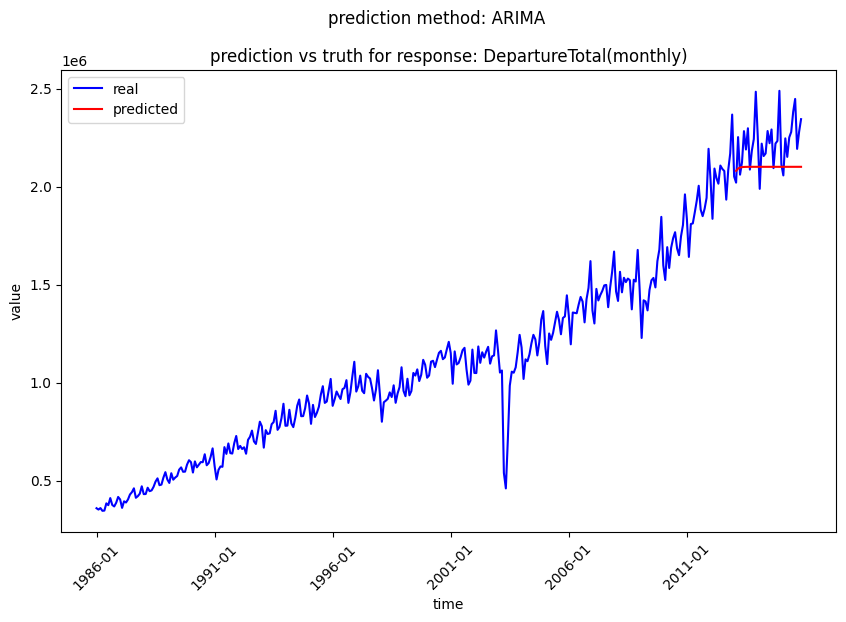

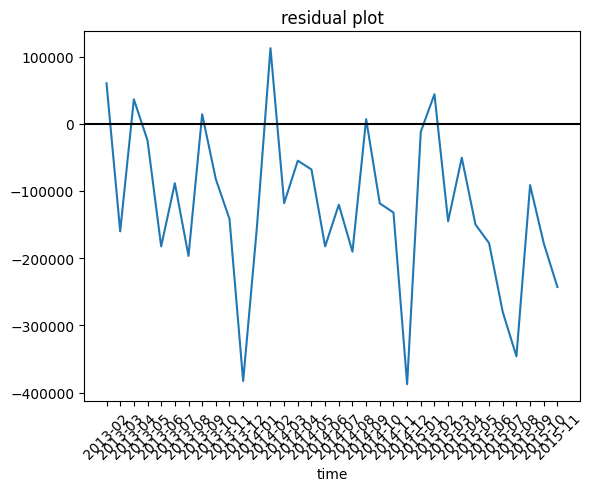

In [41]:
y_pred=np.array(arimaDF['mean'])

plt.figure(figsize=(10,6))
plt.plot(passengerDeparture.date,passengerDeparture[who_to_pred],color='b',label='real')
plt.plot(DF_pred.date,y_pred,color='r',label='predicted')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('value')
plt.title('prediction vs truth for response: '+who_to_pred+'(monthly)')
plt.suptitle('prediction method: '+'ARIMA')
plt.legend()
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[::60])
plt.show()




plt.plot(DF_pred.date,y_pred-np.array(y_test))
plt.axhline(y=0,color='black')
plt.title('residual plot')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.show()

### Conclusion-1: The above ARIMA approach fails our prediction task.

 The above ARIMA approach fails our prediction task because the monthly data series is not stationary (variance changes over time). To overcome this, several approaches can be taken. One possible approach is to calculate the difference for $y_t$ (this will result in a first-order difference) and keep doing this (resulting in higher-order differences) until the resulting series becomes stationary. However, we adopt another approach called data transformation. We aggregate the monthly data within the same year to transform (in this case, sum up) them to the total yearly data, and this also effectively eliminates the non-stationarity.

In [42]:
df_yearSum=passengerDeparture.groupby('year')[who_to_pred].sum().reset_index()

model=ARIMA(pd.Series(df_yearSum[who_to_pred].tolist()[1:22],index=pd.to_datetime(df_yearSum.year,format='%Y')[1:22]),order=(1,1,1))
fitted_model=model.fit()
fitted_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -304.037
Date:                Fri, 26 Apr 2024   AIC                            614.074
Time:                        13:46:41   BIC                            617.061
Sample:                    01-01-1987   HQIC                           614.657
                         - 01-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9943      0.077     12.869      0.000       0.843       1.146
ma.L1         -0.9628      0.299     -3.216      0.001      -1.550      -0.376
sigma2      1.342e+12   1.47e-13   9.11e+24      0.000    1.34e+12    1.34e+12
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 8.89
Prob(Q):                              0.24   Prob(JB):                         0.01
Heteroskedasticity (H):              32.25   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.07e+40. Standard errors may be unstable.
"""

In [43]:
arimaDF=fitted_model.get_forecast(steps=len(df_yearSum)-22).summary_frame()
arimaDF

y                   mean       mean_se  mean_ci_lower  mean_ci_upper
2008-01-01  1.814884e+07  1.163797e+06   1.586784e+07   2.042984e+07
2009-01-01  1.871279e+07  1.678928e+06   1.542215e+07   2.200343e+07
2010-01-01  1.927351e+07  2.096395e+06   1.516466e+07   2.338237e+07
2011-01-01  1.983102e+07  2.466643e+06   1.499649e+07   2.466555e+07
2012-01-01  2.038534e+07  2.808708e+06   1.488037e+07   2.589030e+07
2013-01-01  2.093648e+07  3.132097e+06   1.479768e+07   2.707528e+07
2014-01-01  2.148447e+07  3.442309e+06   1.473767e+07   2.823127e+07
2015-01-01  2.202931e+07  3.742829e+06   1.469350e+07   2.936512e+07

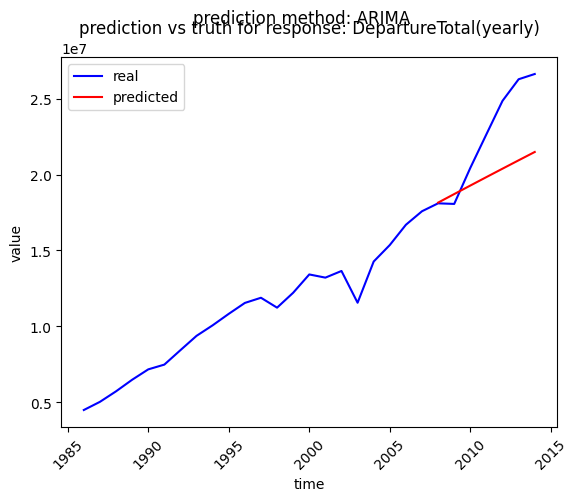

In [44]:
plt.plot(df_yearSum.year.tolist()[:-1],df_yearSum[who_to_pred].tolist()[:-1],color='b',label='real')
plt.plot(df_yearSum.year.tolist()[-len(arimaDF):-1],arimaDF['mean'].tolist()[:-1],color='r',label='predicted')
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('value')
plt.title('prediction vs truth for response: '+who_to_pred+'(yearly)')
plt.suptitle('prediction method: '+'ARIMA')
plt.legend()
plt.show()

###  Conclusion-2 about ARIMA

 It can be seen that the yearly trend can be captured by ARIMA, although not so precisely.

## Task 6: Other insights and conclusions



1. From the various graphs generated in task 4, we can observe that tourists and flights from Southeast Asia are the most numerous. This suggests that trade or tourism ties with Southeast Asia may be the most significant for each region. Further confirmation is needed through additional data collection and analysis. However, we can reasonably speculate that for Singapore's tourism industry, it should pay more attention to the demands of Southeast Asia, and even develop corresponding special activities based on the customs and festivals of Southeast Asian countries.


2. All data experienced a sharp decline in 2003, likely due to the SARS outbreak. This tells us that sometimes models fail to predict unforeseen events. At the same time, data can accurately record history.

3. More complex algorithms do not always perform better; appropriateness is key. Linear regression is a relatively simple algorithm, yet it performs the best.